# **Plan d’action**
---


## 1. Préparation et exploration initiale des données

## 2. Nettoyage et mise en forme ciblée

## 3. Analyse descriptive (EDA – Exploratory Data Analysis)


## 4. Encodage et préparation des variables pour analyses avancées

---

## 5. Analyses statistiques et multivariées

1. **Analyse descriptive approfondie (corrélations) :**
   - Corrélations (Pearson/Spearman) entre Launch_year, Rating_value, Rating_count.
   - Tests de chi2 ou corrélations entre variables qualitatives encodées.

2. **PCA (Analyse en Composantes Principales) :**
   - Visualiser l’organisation globale des parfums dans un espace réduit (2D ou 3D).
   - Identifier les variables qui contribuent le plus aux axes.

3. **Clustering :**
   - K-means ou clustering hiérarchique.
   - Sélection du nombre de clusters (méthode du coude, silhouette score).
   - Interprétation des groupes formés.

4. **Analyse prédictive (optionnel) :**
   - Construire un modèle de classification ou de régression (ex. prédire Rating_value).
   - Mesurer la performance (accuracy, recall, RMSE, etc.).

---

## 6. Interprétation et mise en perspective

1. **Synthèse des analyses descriptives :**
   - Parfums ou brandtachent par leurs caractéristiques.

2. **Résultats PCA et clustering :**
   - Groupements de parfums par accords, genre, année de lancement, etc.
   - Caractéristiques majeures de chaque cluster.

3. **Limites de l’étude :**
   - Données manquantes, biais de sélection (sites sources, etc.).
   - Absence d’informations sur le prix, ventes réelles, etc.

4. **Conclusions et pistes futures :**
   - Possibilité d’ajouter des variables supplémentaires (prix, notes textuelles).
   - Approfondir l’analyse temporelle, sentiment analysis, etc.

---

## 7. Documentation et présentation

1. **Organisation du code :**
   - Notebook propre, sections claires pour chaque étape.

2. **Visualisations :**
   - Graphiques pertinents (histogrammes, barplots, boxplots, biplots pour PCA).

3. **Rapport final (ex. LaTeX) :**
   - Introduction, méthodologie, résultats, discussion, conclusion.
   - Mise en avant des points clés et des perspectives.


# 1. **Préparation et exploration initiale des données OK**

---

## 1.1 **Inspection générale :**
   - Aperçu des premières lignes du dataset (head).
   - Dimension du tableau (nombre de lignes, nombre de colonnes).
   - Types de chaque variable (object, float, int, etc.).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
'FDS = Fragrantica Data Set'
FDS = pd.read_csv('Fragrantica_dataset.csv')
FDS.head()

,nom_parfum,marque,nose,launch_year,rating_value,rating_count,main_accords,gender,longevity,sillage,price_feeling,top_notes,middle_notes,base_notes,url
0,#Cool Vibes,Zara,NaN,2020.0,4.23,13,"['vanilla', 'fruity', 'sweet', 'citrus', 'powd...",female,very weak,NaN,ok,[],[],[],https://www.fragrantica.com/perfume/Zara/Cool-...
1,#Weekend Plan,Zara,NaN,2020.0,4.33,3,"['citrus', 'floral', 'fresh spicy', 'vanilla',...",NaN,NaN,NaN,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/Weeke...
2,01 Magic Onsen,Zara,NaN,2017.0,3.29,38,"['musky', 'white floral', 'woody', 'powdery', ...",NaN,very weak,intimate,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/01-Ma...
3,02 Sweet Vanilla,Zara,NaN,2017.0,3.93,127,"['fruity', 'powdery', 'vanilla', 'woody', 'swe...",female,moderate,average,good value,"['Chestnut', 'Almond']",['Caramel'],"['Cedar', 'Vanilla', 'Musk']",https://www.fragrantica.com/perfume/Zara/02-Sw...
4,Amber Vanilla,Zara,NaN,NaN,4.23,35,"['amber', 'vanilla', 'powdery']",NaN,long lasting,average,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/Amber...


In [3]:
print(f"Dimensions du dataset = {FDS.shape}")
#On veut que rating_count soit un entier
print(f"Nombre de rating_count vide = {FDS['rating_count'].isnull().sum()}")
FDS['rating_count'] = FDS['rating_count'].fillna(0)
FDS['rating_count'] = FDS['rating_count'].astype(str).str.replace(',', '').str.replace('.0', '')
FDS['rating_count'] = FDS['rating_count'].astype(int)

print(f"types de chaques variables = {FDS.dtypes}")


Dimensions du dataset = (21778, 15)
Nombre de rating_count vide = 687
types de chaques variables = nom_parfum        object
marque            object
nose              object
launch_year      float64
rating_value     float64
rating_count       int32
main_accords      object
gender            object
longevity         object
sillage           object
price_feeling     object
top_notes         object
middle_notes      object
base_notes        object
url               object
dtype: object


## 1.2 **Qualité des données :**
   - Détection des valeurs manquantes (NaN) par variable.
   - Proportion de données manquantes (par variable, par ligne).
   - Gestion de ces valeurs manquantes (suppression ou imputation selon la pertinence et le volume manquant).
   - Détection des doublons.

## **Valeurs manquantes**

In [4]:
# Détection des valeurs manquantes et proportion de valeurs manquantes
print(f"Valeurs manquantes = {FDS.isnull().sum()}")
pourcentage = FDS.isnull().sum() / FDS.shape[0] * 100
print(f"Pourcentage de valeurs manquantes = {pourcentage} %")
# Pour l'instant on garde tout


Valeurs manquantes = nom_parfum           0
marque               0
nose             12523
launch_year       1920
rating_value       687
rating_count         0
main_accords         0
gender            6835
longevity         4843
sillage           4237
price_feeling     7393
top_notes            0
middle_notes         0
base_notes           0
url                  0
dtype: int64
Pourcentage de valeurs manquantes = nom_parfum        0.000000
marque            0.000000
nose             57.502985
launch_year       8.816237
rating_value      3.154560
rating_count      0.000000
main_accords      0.000000
gender           31.384884
longevity        22.238038
sillage          19.455414
price_feeling    33.947103
top_notes         0.000000
middle_notes      0.000000
base_notes        0.000000
url               0.000000
dtype: float64 %


**Il y 1920 années de lancement manquantes** ce n'est pas un pb de scrapping mais bien d'info manquante sur le site

In [5]:
# Affichons quelques parfums ou lunch_year est manquant
annee_manquante = FDS[FDS['launch_year'].isnull()]
#annee_manquante.to_csv('annee_manquante.csv', index=False)


**mettre nom des varialbes an anglais**

In [6]:
# On met tous les nomq de variables en anglais
FDS = FDS.rename(columns={'marque': 'brand'})
FDS = FDS.rename(columns={'nom_parfum': 'name'})

**Doublons**

In [7]:
#Repérage des doublons
print(f"Nombre de doublons = {FDS['url'].duplicated().sum()}")


Nombre de doublons = 0


## 1.3 **Exploration rapide des distributions :**
   - Pour les variables numériques (Launch_year, Rating_value, Rating_count) : histogrammes, statistiques descriptives (moyenne, médiane, etc.).
   - Pour les variables qualitatives (marque, nose, longevity, sillage, etc.) : tables de fréquences, comptages.


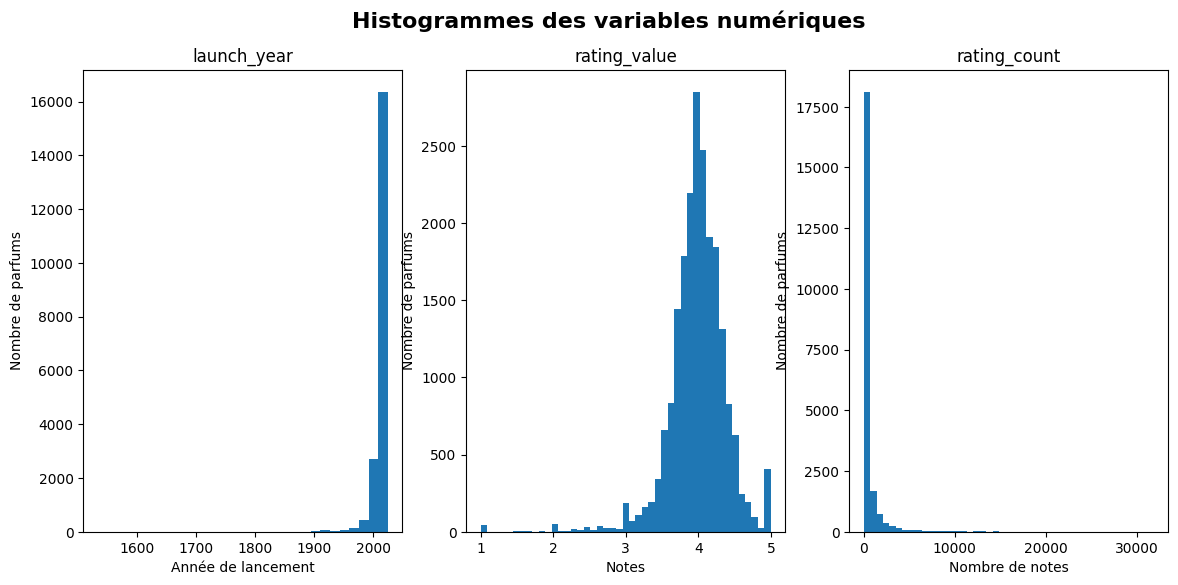

Statistiques descriptives des variables numériques : 
        launch_year  rating_value  rating_count
count  19858.000000  21091.000000  21778.000000
mean    2014.079917      3.989994    557.835292
std       13.578242      0.401140   1645.996011
min     1533.000000      1.000000      0.000000
25%     2011.000000      3.810000     21.000000
50%     2017.000000      4.000000     99.000000
75%     2021.000000      4.210000    398.000000
max     2025.000000      5.000000  31826.000000


In [8]:
#Variables numériques
launch_year = FDS['launch_year']
rating_count = FDS['rating_count']
rating_value = FDS['rating_value']

# histogrammes
plt.figure(figsize=(14,6))
plt.suptitle('Histogrammes des variables numériques', fontsize=16, fontweight='bold')


plt.subplot(1, 3, 1)
plt.hist(launch_year, bins=30)
plt.xlabel('Année de lancement')
plt.ylabel('Nombre de parfums')
plt.title('launch_year')

plt.subplot(1, 3, 2)
plt.hist(rating_value, bins=45)
plt.xlabel('Notes')
plt.ylabel('Nombre de parfums')
plt.title('rating_value')

plt.subplot(1, 3, 3)
plt.hist(rating_count, bins=45)
plt.xlabel('Nombre de notes')
plt.ylabel('Nombre de parfums')
plt.title('rating_count')

plt.show()

#Statistiques descriptives des variables numériques
print(f"Statistiques descriptives des variables numériques : \n{FDS.describe()}")

In [9]:
# Variables qualitatives
FDS_quali = FDS.select_dtypes(include='object').drop(columns=['url'])

# On va regarder les modalités de chaque variable qualitative
for col in FDS_quali.columns:
    print(f"Variable {col} :\n")
    print(f"Nombre de modalités : {FDS[col].nunique()}")
    print(f"Nombre de valeurs manquantes : {FDS[col].isnull().sum()}")
    print(f"Répartition des modalités : \n{FDS[col].value_counts(normalize=True)}")
    print("\n")

Variable name :

Nombre de modalités : 21096
Nombre de valeurs manquantes : 0
Répartition des modalités : 
name
Rose                              0.000367
Vetiver                           0.000321
Gold                              0.000321
Cherry Blossom                    0.000276
Gardenia                          0.000276
                                    ...   
Ricci Ricci Reflets Mysterieux    0.000046
Ricci Ricci Dancing Ribbon        0.000046
Ricci Ricci                       0.000046
Ricci Club                        0.000046
Majoromantica 43490.html          0.000046
Name: proportion, Length: 21096, dtype: float64


Variable brand :

Nombre de modalités : 215
Nombre de valeurs manquantes : 0
Répartition des modalités : 
brand
The Dua Brand             0.076591
Avon                      0.060198
Zara                      0.046836
Victoria's Secret         0.036367
Bath & Body Works         0.030444
                            ...   
Next                      0.000046
Next Bod

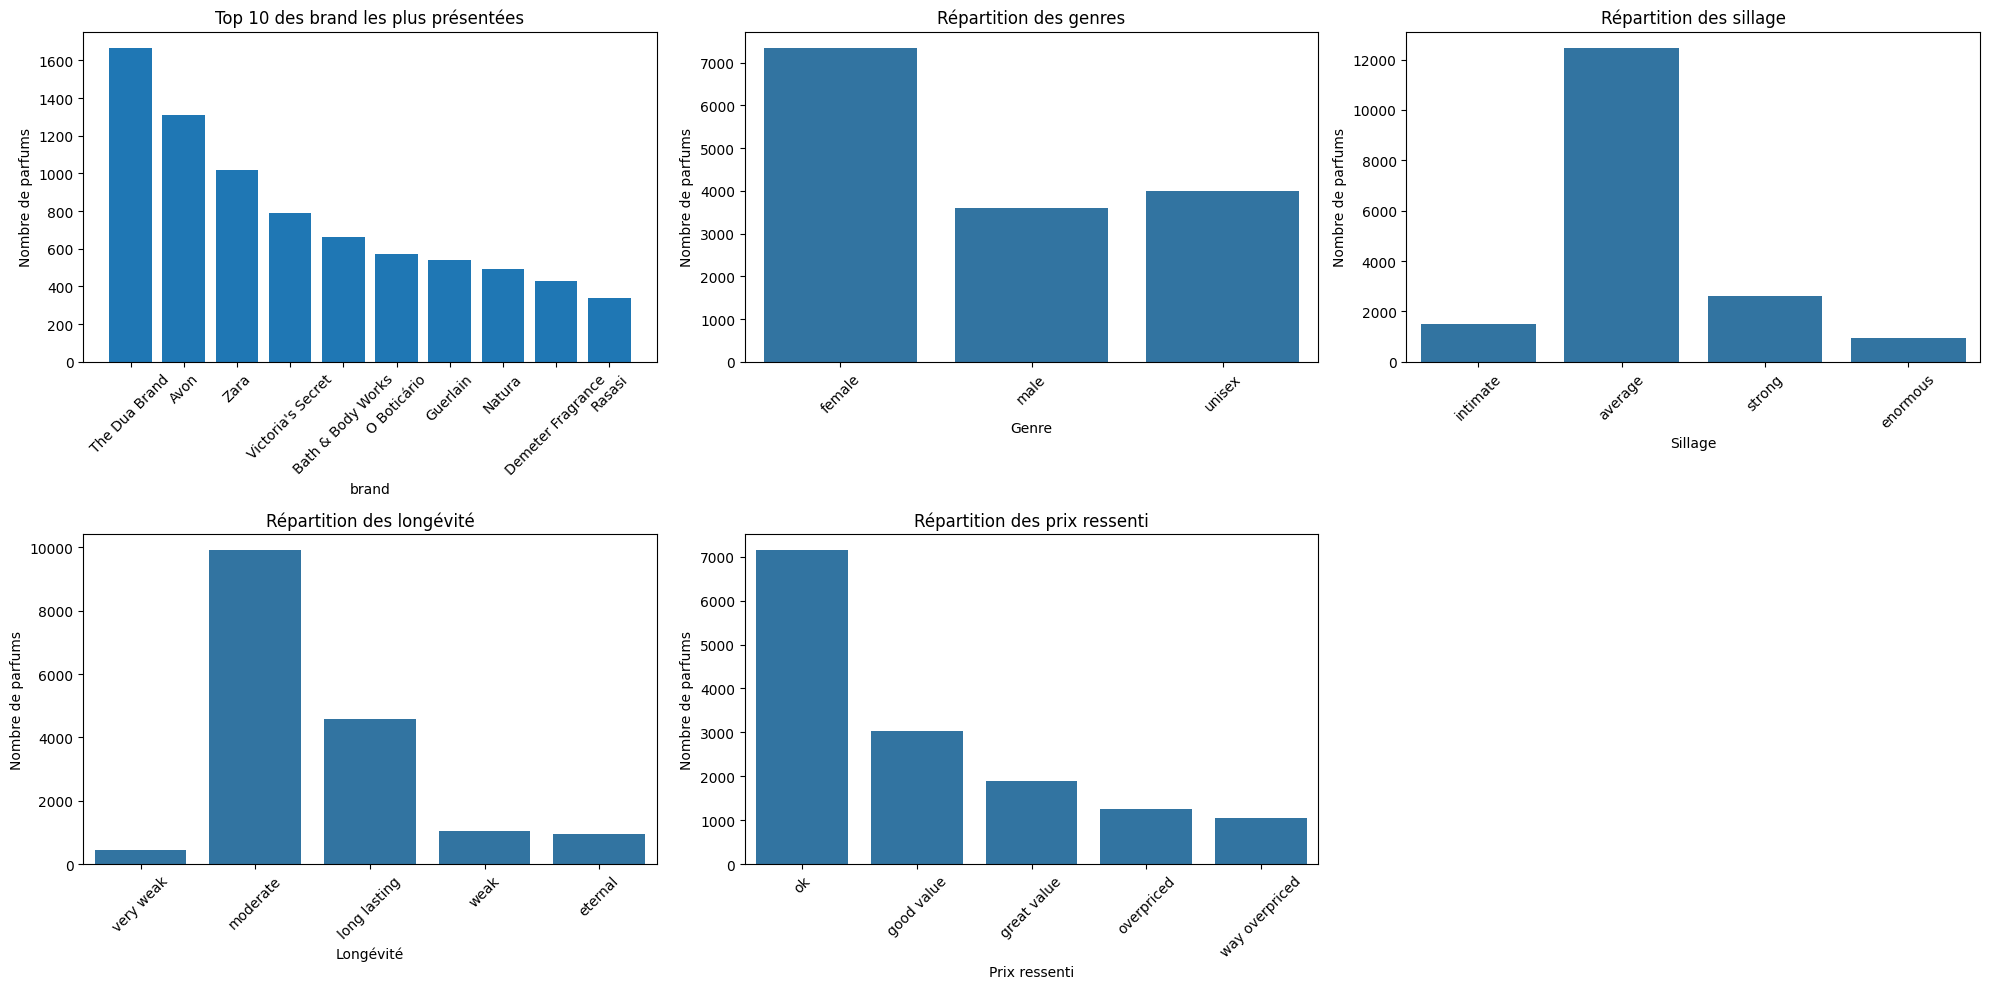

In [10]:
plt.figure(figsize=(20,10))
# brand
# Les 10 brand les plus représentées
top10_brand = FDS['brand'].value_counts().head(10)
plt.subplot(2, 3, 1)
plt.bar(top10_brand.index, top10_brand.values)
plt.title('Top 10 des brand les plus présentées')
plt.xlabel('brand')
plt.ylabel('Nombre de parfums')
plt.xticks(rotation=45)

# gender
# Répartition des genres
plt.subplot(2, 3, 2)
sns.countplot(data=FDS, x= FDS['gender'])
plt.title('Répartition des genres')
plt.xlabel('Genre')
plt.ylabel('Nombre de parfums')
plt.xticks(rotation=45)

# sillage
# Répartition des sillage
plt.subplot(2, 3, 3)
sns.countplot(data=FDS, x= FDS['sillage'])
plt.title('Répartition des sillage')
plt.xlabel('Sillage')
plt.ylabel('Nombre de parfums')
plt.xticks(rotation=45)

# longevity
# Répartition des longévité
plt.subplot(2, 3, 4)
sns.countplot(data=FDS, x= FDS['longevity'])
plt.title('Répartition des longévité')
plt.xlabel('Longévité')
plt.ylabel('Nombre de parfums')
plt.xticks(rotation=45)

# price_feeling
# Répartition des prix ressenti
plt.subplot(2, 3, 5)
sns.countplot(data=FDS, x= FDS['price_feeling'])
plt.title('Répartition des prix ressenti')
plt.xlabel('Prix ressenti')
plt.ylabel('Nombre de parfums')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# 2. **Nettoyage et mise en forme ciblée**
---

##  2.1 *Standardiser les variables qualitatives :*
   - Harmoniser l’orthographe des variables, etc.
   - Gérer les variations de casse (majuscules/minuscules).

In [11]:
#On à déja mis le nom du toute les variables en anglais et à la m^me casse

## 2.2 *Traiter les variable `main_accords`,  `top_notes ` `middle_notes`,`base_note` qui sont des liste :* **POUR L'INSTANT RIEN N'EST FAIT**
   - Décider de la représenter en tant que chaîne de caractères (ex. concaténée par “;”) ou l’encoder (one-hot, multi-label).

## 2.3 *Segmentation éventuelle :*
   - Séparer l’année de lancement en périodes (ex. avant 2000, 2000-2010, etc.) pour des analyses comparatives.
   - Catégoriser ou agréger certaines variables si elles sont trop granulaires.

In [12]:
# name --> OK
# brand --> Segmentention possibles : , par nombre de parfum, Par popularité, par type de parfum, par genre, par prix, ...
# nose --> Segmentation possibles : par nombre de parfum, par popularité, par genre, par prix, ...

#launch_year --> Créer une variable 'launch_period' par groupe de 5 année
FDS['launch_period'] = pd.cut(FDS['launch_year'],
                              bins=[1900, 1995,2000,2005,2010,2015,2020,2030],
                              labels=['Avant 1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015', '2015-2020', 'Après 2020'])

# rating value --> Créer une variable 'rating_category' en 3 catégories || On sépare après avoir regardé distrubtion des notes
FDS['rating_category'] = pd.cut(FDS['rating_value'],
                                bins=[0, 3.3, 3.9, 4.2, 4.5, 5],
                                labels=['Très faible [0 , 3.3]', 'Faible ]3.3 , 3.9]', 'Moyenne ]3.9 , 4.2]', 'Elevée ]4.2 , 4.5]', 'Excellente ]4.5 , 5]'])

# rating count --> Pour créer une variable POPULARITY
FDS['popularity'] = pd.cut(FDS['rating_count'],
                           bins=[0, 50, 200, 1000, 3000, 300000],
                           labels=['Très faible (<50 votes)', 'Faible ]50 , 200] votes', 'Moyenne ]200 , 1000] votes', 'Elevée ]1000 , 3000] votes', 'Excellente (>3000 votes]'])
print(FDS['popularity'].value_counts(normalize=True))

# main_accord --> Sous forme de liste donc + difficile à segmenter
# gender --> OK
# sillage --> OK
# longevity --> OK
# price_feeling --> OK
# top_notes --> Sous forme de liste donc + difficile à segmenter
# heart_notes --> Sous forme de liste donc + difficile à segmenter
# base_notes --> Sous forme de liste donc + difficile à segmenter
# url --> OK

#On remet la colonne 'url' à la fin
# Déplacer la colonne 'url' à la fin
cols = [col for col in FDS.columns if col != 'url'] + ['url']
FDS = FDS[cols]

# Vérification
FDS.head()


popularity
Très faible (<50 votes)       0.361292
Faible ]50 , 200] votes       0.261770
Moyenne ]200 , 1000] votes    0.247641
Elevée ]1000 , 3000] votes    0.088806
Excellente (>3000 votes]      0.040491
Name: proportion, dtype: float64


,name,brand,nose,launch_year,rating_value,rating_count,main_accords,gender,longevity,sillage,price_feeling,top_notes,middle_notes,base_notes,launch_period,rating_category,popularity,url
0,#Cool Vibes,Zara,NaN,2020.0,4.23,13,"['vanilla', 'fruity', 'sweet', 'citrus', 'powd...",female,very weak,NaN,ok,[],[],[],2015-2020,"Elevée ]4.2 , 4.5]",Très faible (<50 votes),https://www.fragrantica.com/perfume/Zara/Cool-...
1,#Weekend Plan,Zara,NaN,2020.0,4.33,3,"['citrus', 'floral', 'fresh spicy', 'vanilla',...",NaN,NaN,NaN,NaN,[],[],[],2015-2020,"Elevée ]4.2 , 4.5]",Très faible (<50 votes),https://www.fragrantica.com/perfume/Zara/Weeke...
2,01 Magic Onsen,Zara,NaN,2017.0,3.29,38,"['musky', 'white floral', 'woody', 'powdery', ...",NaN,very weak,intimate,NaN,[],[],[],2015-2020,"Très faible [0 , 3.3]",Très faible (<50 votes),https://www.fragrantica.com/perfume/Zara/01-Ma...
3,02 Sweet Vanilla,Zara,NaN,2017.0,3.93,127,"['fruity', 'powdery', 'vanilla', 'woody', 'swe...",female,moderate,average,good value,"['Chestnut', 'Almond']",['Caramel'],"['Cedar', 'Vanilla', 'Musk']",2015-2020,"Moyenne ]3.9 , 4.2]","Faible ]50 , 200] votes",https://www.fragrantica.com/perfume/Zara/02-Sw...
4,Amber Vanilla,Zara,NaN,NaN,4.23,35,"['amber', 'vanilla', 'powdery']",NaN,long lasting,average,NaN,[],[],[],NaN,"Elevée ]4.2 , 4.5]",Très faible (<50 votes),https://www.fragrantica.com/perfume/Zara/Amber...


## 2.4 *Détection d’anomalies :*
   - Valeurs extrêmes pour Rating_value, Launch_year (parfums trop anciens ou futurs).
   - Vérification de la cohérence générale.

In [13]:
#Cohérence des données
# brand
brand_mal_scrapee = FDS[FDS['brand'].map(FDS['brand'].value_counts()) <= 5]
print(f"La liste des parfums dont la marque n'est présente que 5 fois ou moins est : \n {brand_mal_scrapee[['name','brand']]}")
# Il y a eu des erreurs de scraping
print(f"\n \n Nombre de parfums dont la marque a donc mal été scrappée = {brand_mal_scrapee.shape[0]}")
'''
zara --> ZARA
Magnetic --> ZARA
Hypnotic --> ZARA
Quizas --> Loewe
Quizàs --> Loewe
Unless They're Crazy Hot --> By Kilian
don't be shy Anniversary Edition --> By Kilian
In The Bedroom --> By Kilian
Baby --> Victoria's Secret
Love --> Victoria's Secret
etc...
'''
liste_url_mal_scrapee = brand_mal_scrapee['url']
#liste_url_mal_scrapee.to_csv('liste_url_mal_scrapee.csv', index=True)

# On les supprime du dataset et on les rajouteras au propre
FDS = FDS.drop(brand_mal_scrapee.index)
print(FDS.shape)

La liste des parfums dont la marque n'est présente que 5 fois ou moins est : 
                                                 name  \
1058             Vanilla Collection 01: Irresistible   
1059                   Vanilla Collection 02: Unique   
2053                                           Peace   
2103                                           Candy   
3027                                  Dark Chocolate   
4173                                      Strawberry   
4378                              Madagascar Vanilla   
4384                                            Mint   
4623                                A Dark Chocolate   
9795                                          Quizas   
9796                                          Quizás   
9797                                          Quizas   
10397                                              O   
11303                                           Love   
13117                        Don't Get Me Wrong Baby   
15052                    

In [14]:
# Détection des années incohérentes
current_year = 2025
anomalies_year = FDS[(FDS['launch_year'] < 1950) | (FDS['launch_year'] > current_year)]

print(f"Il y a {len(anomalies_year)} valeurs extrêmes pour Launch_year")
# En vrai les formules datant d'avant 1950 n'ont rien à voir avec celle d'aujourd'hui
# On peut les retirer en gardant les années non renseignées
FDS = FDS[(FDS['launch_year'] >= 1950) | (FDS['launch_year'].isna())]
FDS.shape

Il y a 165 valeurs extrêmes pour Launch_year


(21583, 18)

## 2.5 On extrait un dataset 'clean'

In [15]:
FDS.to_csv('FDS_cleaned.csv', index=False)

# **3. Analyse descriptive (EDA – Exploratory Data Analysis)**
---

## 3.1 *Analyse variable numériques :*
   - Distribution de Launch_year (moyenne, médiane, écart-type, min, max).
   - Distribution de Rating_value, de Rating_count.
   - etc

### 3.1.1 Analyse des distributions

#### Distribution variables numériques

In [16]:
launch_year = FDS['launch_year']
rating_count = FDS['rating_count']
rating_value = FDS['rating_value']
var_num = FDS[['launch_year', 'rating_count', 'rating_value']]

In [17]:
# Calcul des statistiques descriptives pour les variables numériques
stats = FDS[['launch_year', 'rating_value', 'rating_count']].describe()
print("Statistiques descriptives :")
print(stats)

Statistiques descriptives :
        launch_year  rating_value  rating_count
count  19664.000000  20904.000000  21583.000000
mean    2014.914463      3.988517    557.620303
std        9.334789      0.401069   1648.146167
min     1950.000000      1.000000      0.000000
25%     2012.000000      3.810000     21.000000
50%     2017.000000      4.000000     99.000000
75%     2021.000000      4.210000    397.500000
max     2025.000000      5.000000  31826.000000


In [18]:
# Détection des valeurs extrêmes (outliers) pour chaque variable
# Utilisation de la règle des 1.5 * IQR (Interquartile Range)
for col in ['launch_year', 'rating_value', 'rating_count']:
    Q1 = FDS[col].quantile(0.25)  # Premier quartile
    Q3 = FDS[col].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Intervalle interquartile
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = FDS[(FDS[col] < lower_bound) | (FDS[col] > upper_bound)]
    print(f"\nOutliers pour {col} : {len(outliers)} valeurs extrêmes détectées.")
    print(outliers[[col]])


Outliers pour launch_year : 1000 valeurs extrêmes détectées.
       launch_year
1260        1993.0
1261        1975.0
1263        1986.0
1264        1998.0
1266        1997.0
...            ...
21769       1982.0
21771       1987.0
21774       1994.0
21775       1996.0
21776       1976.0

[1000 rows x 1 columns]

Outliers pour rating_value : 1064 valeurs extrêmes détectées.
       rating_value
33             5.00
44             2.75
52             3.00
150            2.33
169            3.00
...             ...
21477          5.00
21486          2.75
21542          5.00
21622          3.20
21722          3.00

[1064 rows x 1 columns]

Outliers pour rating_count : 2805 valeurs extrêmes détectées.
       rating_count
73             1541
125            1108
305            1108
307            1948
391            1695
...             ...
21709          1465
21710          1768
21729           987
21734          1631
21739          5394

[2805 rows x 1 columns]


**Histogrammes**

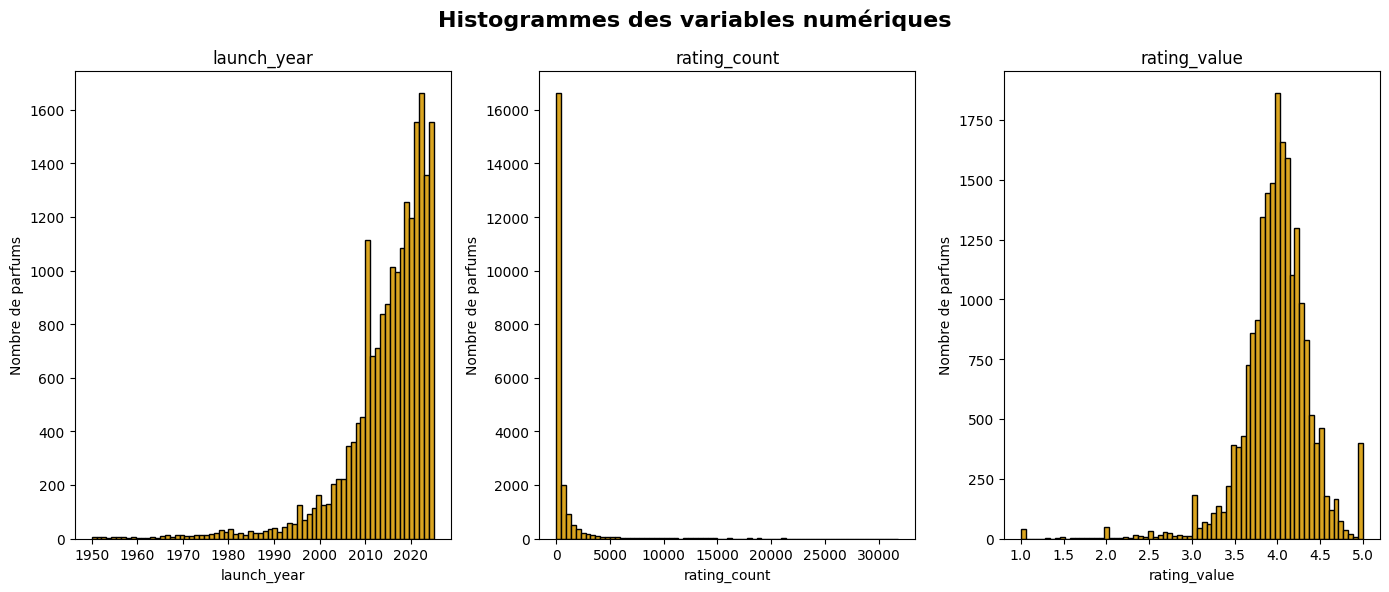

In [19]:
plt.figure(figsize=(14,6))

for i ,variable in enumerate([launch_year, rating_count, rating_value]):
    plt.subplot(1, 3, i+1)
    plt.hist(variable, bins=70,color='goldenrod', edgecolor='black')
    plt.xlabel(variable.name)
    plt.ylabel('Nombre de parfums')
    plt.title(variable.name)
    
plt.suptitle('Histogrammes des variables numériques', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Representation complémentaires

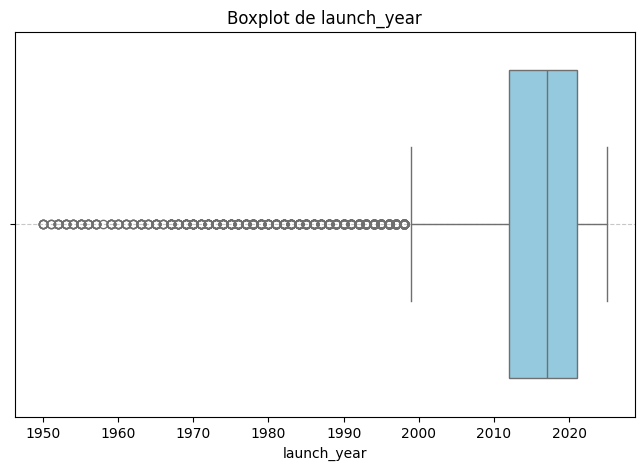

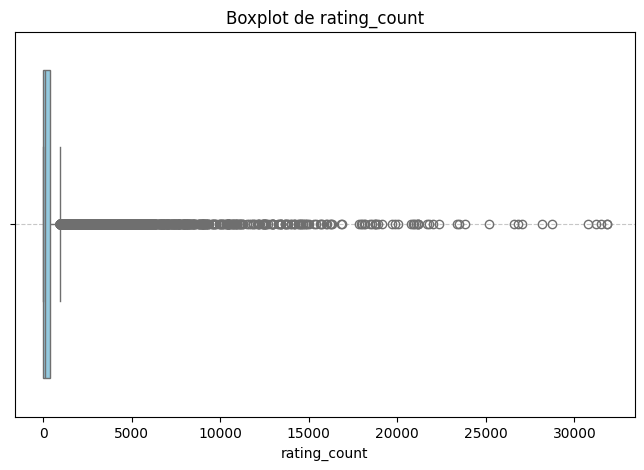

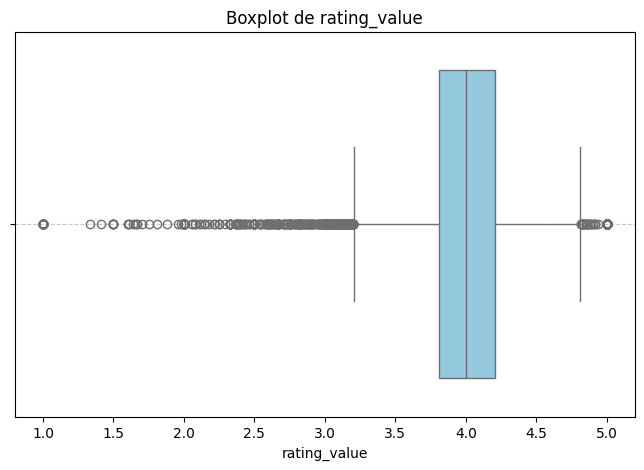

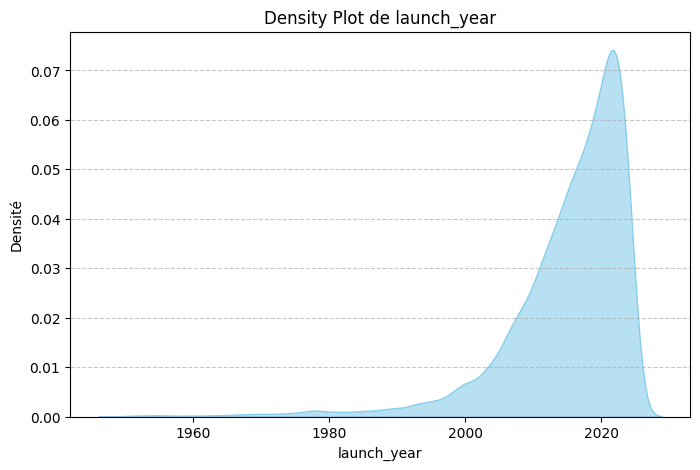

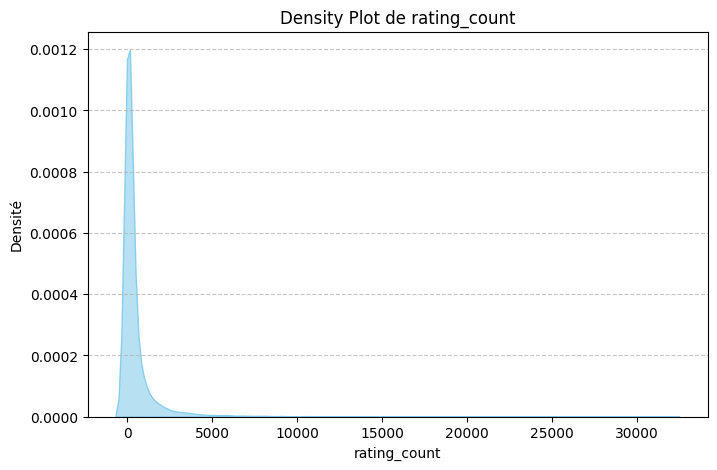

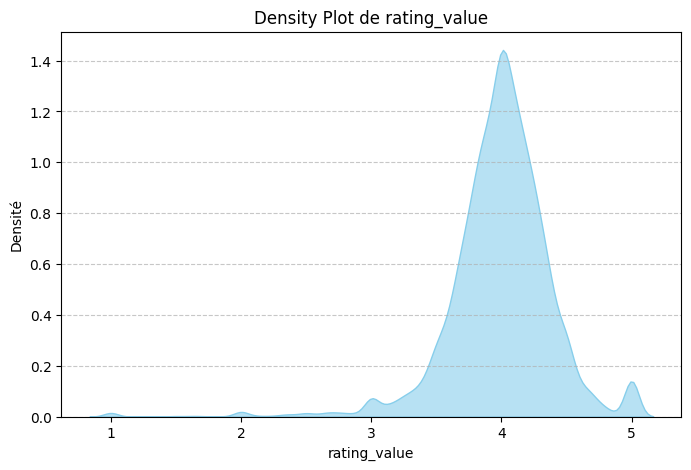

In [20]:
# Boxplots pour visualiser la médiane, la dispersion et les outliers
for col in var_num:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=FDS[col], color='skyblue')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Density plots (KDE) pour visualiser la forme de la distribution
for col in var_num:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(FDS[col].dropna(), fill=True, color='skyblue', alpha=0.6)
    plt.title(f"Density Plot de {col}")
    plt.xlabel(col)
    plt.ylabel("Densité")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\1510608375.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=launch_period_counts.index, y=launch_period_counts.values, palette='Blues_d')


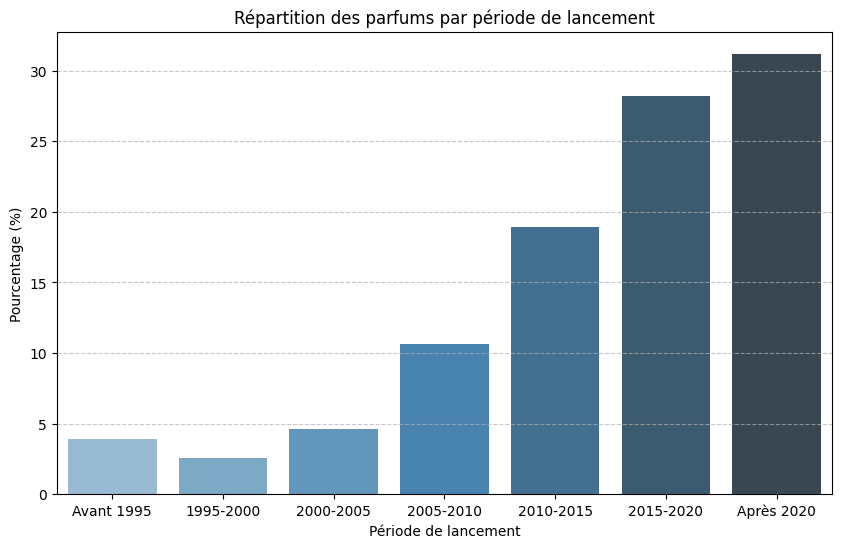

C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\1510608375.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_category_counts.index, y=rating_category_counts.values, palette='Greens_d')


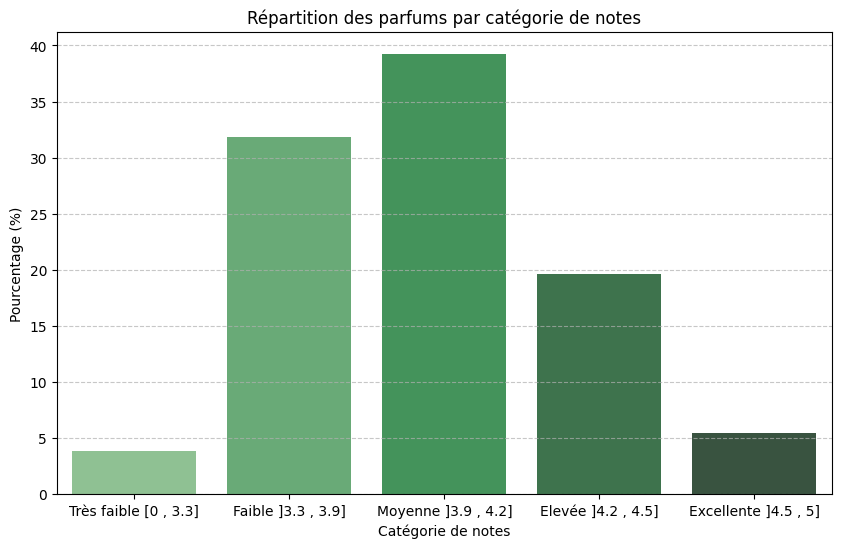

In [21]:
# Répartition des parfums par période de lancement
launch_period_counts = FDS['launch_period'].dropna().value_counts(normalize=True) * 100
# Diagramme en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=launch_period_counts.index, y=launch_period_counts.values, palette='Blues_d')
plt.title("Répartition des parfums par période de lancement")
plt.xlabel("Période de lancement")
plt.ylabel("Pourcentage (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Répartition des parfums par catégorie de notes
rating_category_counts = FDS['rating_category'].dropna().value_counts(normalize=True) * 100

# Diagramme en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_category_counts.index, y=rating_category_counts.values, palette='Greens_d')
plt.title("Répartition des parfums par catégorie de notes")
plt.xlabel("Catégorie de notes")
plt.ylabel("Pourcentage (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.1.2 Relier variables entres elles

#### A) Rating_value VS Rating_count

In [22]:
# Garder les valeurs non nulles pour les calculs
FDS_rating = FDS.dropna(subset=['rating_count', 'rating_value'])

##### **Corrélation**



Coefficient de corrélation entre rating_count et rating_value :
Coefficient de corrélation de Pearson : 0.03
Coefficient de corrélation de Spearman : -0.04


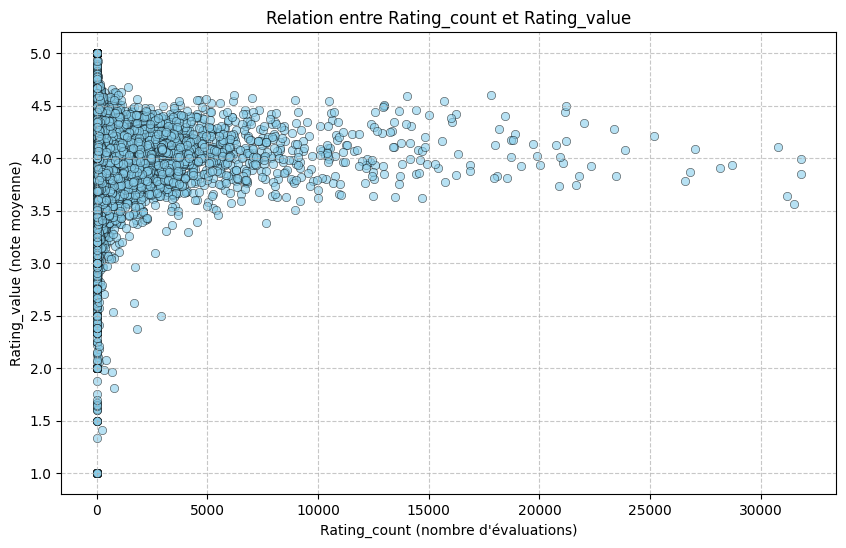

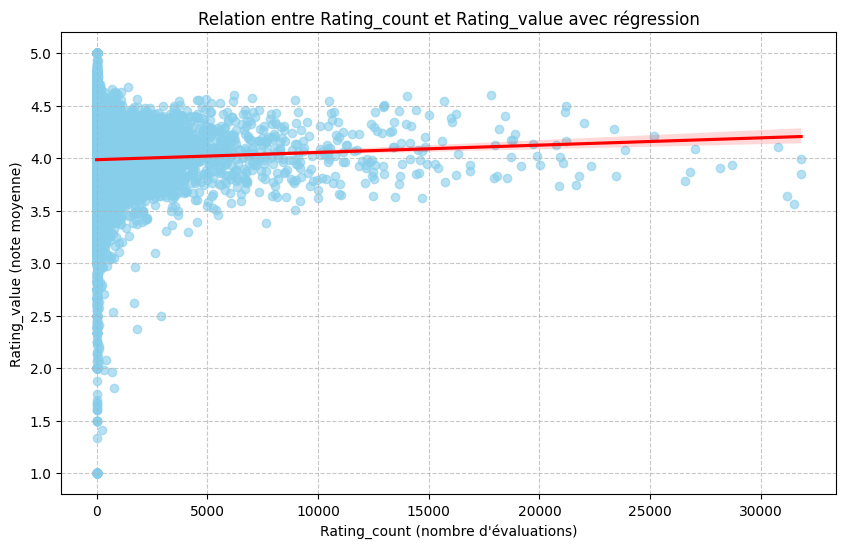

In [23]:
from scipy.stats import spearmanr, pearsonr

# Calcul du coefficient de corrélation
pearson_corr, _ = pearsonr(FDS_rating['rating_count'], FDS_rating['rating_value'])
spearman_corr, _ = spearmanr(FDS_rating['rating_count'], FDS_rating['rating_value'])
# Affichage des résultats
print(f"\n\nCoefficient de corrélation entre rating_count et rating_value :")
print(f"Coefficient de corrélation de Pearson : {pearson_corr:.2f}")
print(f"Coefficient de corrélation de Spearman : {spearman_corr:.2f}")

# Scatter plot (nuage de points)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=FDS_rating, x='rating_count', y='rating_value', alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Relation entre Rating_count et Rating_value")
plt.xlabel("Rating_count (nombre d'évaluations)")
plt.ylabel("Rating_value (note moyenne)")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Visualisation avec une régression (optionnel)
plt.figure(figsize=(10, 6))
sns.regplot(data=FDS_rating, x='rating_count', y='rating_value', scatter_kws={'alpha':0.6, 'color':'skyblue'}, line_kws={'color':'red'})
plt.title("Relation entre Rating_count et Rating_value avec régression")
plt.xlabel("Rating_count (nombre d'évaluations)")
plt.ylabel("Rating_value (note moyenne)")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

**Interprétation :**

Ces résultats suggèrent que le nombre d'évaluations (rating_count) n'a pas d'impact significatif sur la note moyenne (rating_value).

Cela semble indiquer que les parfums très populaires (avec beaucoup d'évaluations) ont des notes à peine plus élevées que les parfums moins populaires.

**En revanche avoir beaucoup d'évaluation fait converger la note vers la moyenne.**


**La meme chose mais en enlevant les parfums à moins de N votes**



Coefficient de corrélation entre rating_count et rating_value :
Coefficient de corrélation de Pearson : 0.06
Coefficient de corrélation de Spearman : 0.09


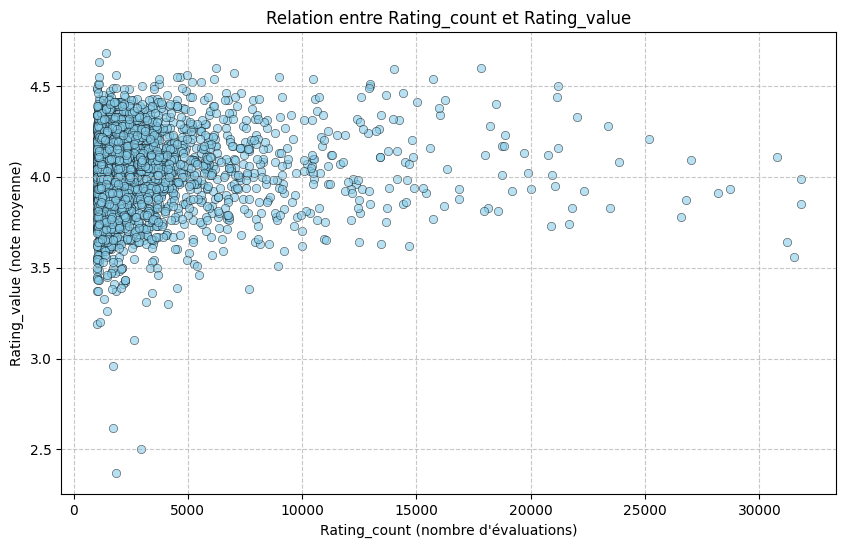

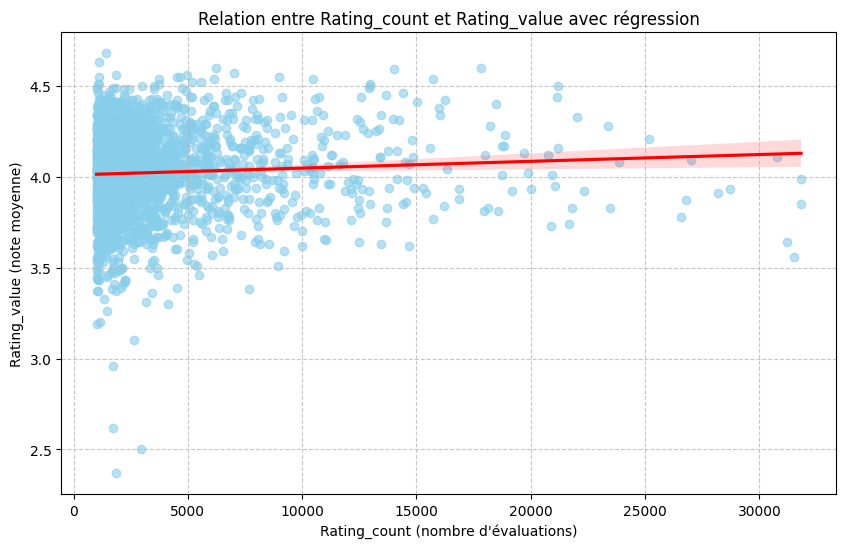

In [24]:
N = 1000 # nombre minimal de votants

FDS_rating_uper_N_votes = FDS.dropna(subset=['rating_count', 'rating_value'])
FDS_rating_uper_N_votes = FDS_rating_uper_N_votes[FDS_rating_uper_N_votes['rating_count'] > N]

# Calcul du coefficient de corrélation
pearson_corr, _ = pearsonr(FDS_rating_uper_N_votes['rating_count'], FDS_rating_uper_N_votes['rating_value'])
spearman_corr, _ = spearmanr(FDS_rating_uper_N_votes['rating_count'], FDS_rating_uper_N_votes['rating_value'])
# Affichage des résultats
print(f"\n\nCoefficient de corrélation entre rating_count et rating_value :")
print(f"Coefficient de corrélation de Pearson : {pearson_corr:.2f}")
print(f"Coefficient de corrélation de Spearman : {spearman_corr:.2f}")

# Scatter plot (nuage de points)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=FDS_rating_uper_N_votes, x='rating_count', y='rating_value', alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Relation entre Rating_count et Rating_value")
plt.xlabel("Rating_count (nombre d'évaluations)")
plt.ylabel("Rating_value (note moyenne)")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Visualisation avec une régression (optionnel)
plt.figure(figsize=(10, 6))
sns.regplot(data=FDS_rating_uper_N_votes, x='rating_count', y='rating_value', scatter_kws={'alpha':0.6, 'color':'skyblue'}, line_kws={'color':'red'})
plt.title("Relation entre Rating_count et Rating_value avec régression")
plt.xlabel("Rating_count (nombre d'évaluations)")
plt.ylabel("Rating_value (note moyenne)")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

##### **Visualisation des clusters potentiels**

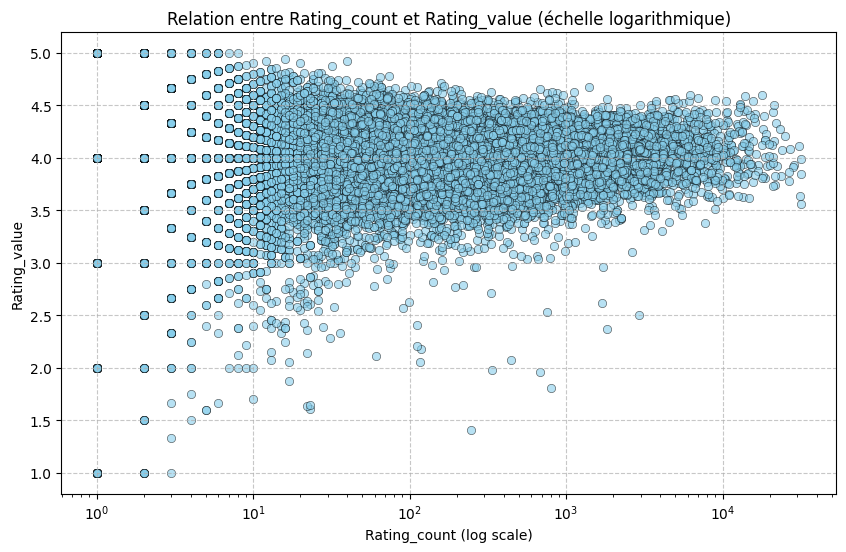

In [25]:
# Scatter plot avec échelle logarithmique pour rating_count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=FDS_rating, x='rating_count', y='rating_value', alpha=0.6, color='skyblue', edgecolor='black')
plt.xscale('log')  # Échelle logarithmique pour mieux visualiser les parfums avec peu d'avis
plt.title("Relation entre Rating_count et Rating_value (échelle logarithmique)")
plt.xlabel("Rating_count (log scale)")
plt.ylabel("Rating_value")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

**clustering K-Means**

C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\460949644.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FDS_rating['cluster'] = kmeans.fit_predict(FDS_rating[['rating_count', 'rating_value']])


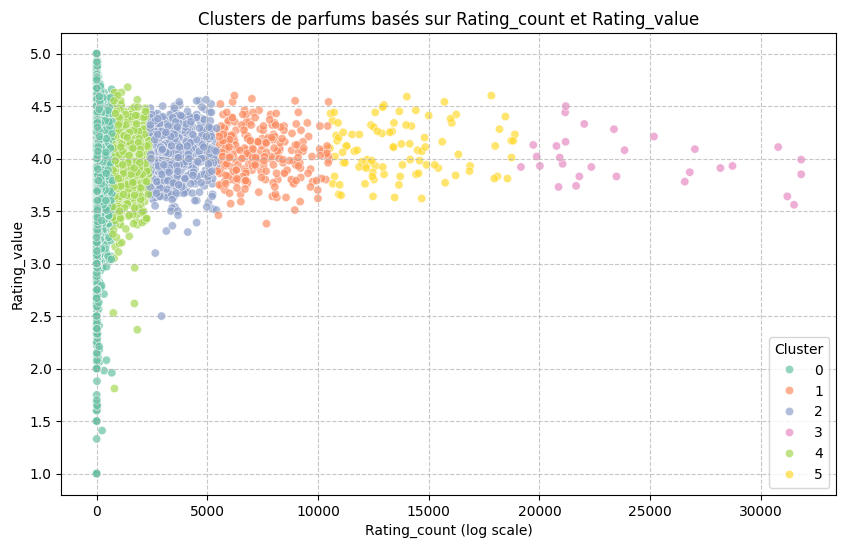

In [26]:
from sklearn.cluster import KMeans

# Préparer les données pour le clustering
#FDS_rating['rating_count_log'] = np.log1p(FDS_rating['rating_count'])  # Transformation logarithmique

#FDS_rating[['rating_count_log', 'rating_value']] = scaler.fit_transform(FDS_rating[['rating_count_log', 'rating_value']])

# Appliquer K-Means avec 3 clusters 
nb_cluster = 6
kmeans = KMeans(n_clusters= nb_cluster, random_state=42)
FDS_rating['cluster'] = kmeans.fit_predict(FDS_rating[['rating_count', 'rating_value']])
#FDS_rating['cluster'] = kmeans.fit_predict(FDS_rating[['rating_count_log', 'rating_value']])

# Visualiser les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=FDS_rating, x='rating_count', y='rating_value', hue='cluster', palette='Set2', alpha=0.7)
#plt.xscale('log')  # Échelle logarithmique pour rating_count
plt.title("Clusters de parfums basés sur Rating_count et Rating_value")
#plt.xlabel("Rating_count")
plt.xlabel("Rating_count (log scale)")
plt.ylabel("Rating_value")
plt.legend(title="Cluster")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

##### **Nombre moyen de votant par ratingvalue et category**

C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\2447165278.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_voters_by_category = FDS_rating.groupby('rating_category')['rating_count'].mean().reset_index()
C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\2447165278.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_voters_by_category, x='rating_category', y='rating_count', palette='Blues_d', ax=axes[0])
C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\2447165278.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

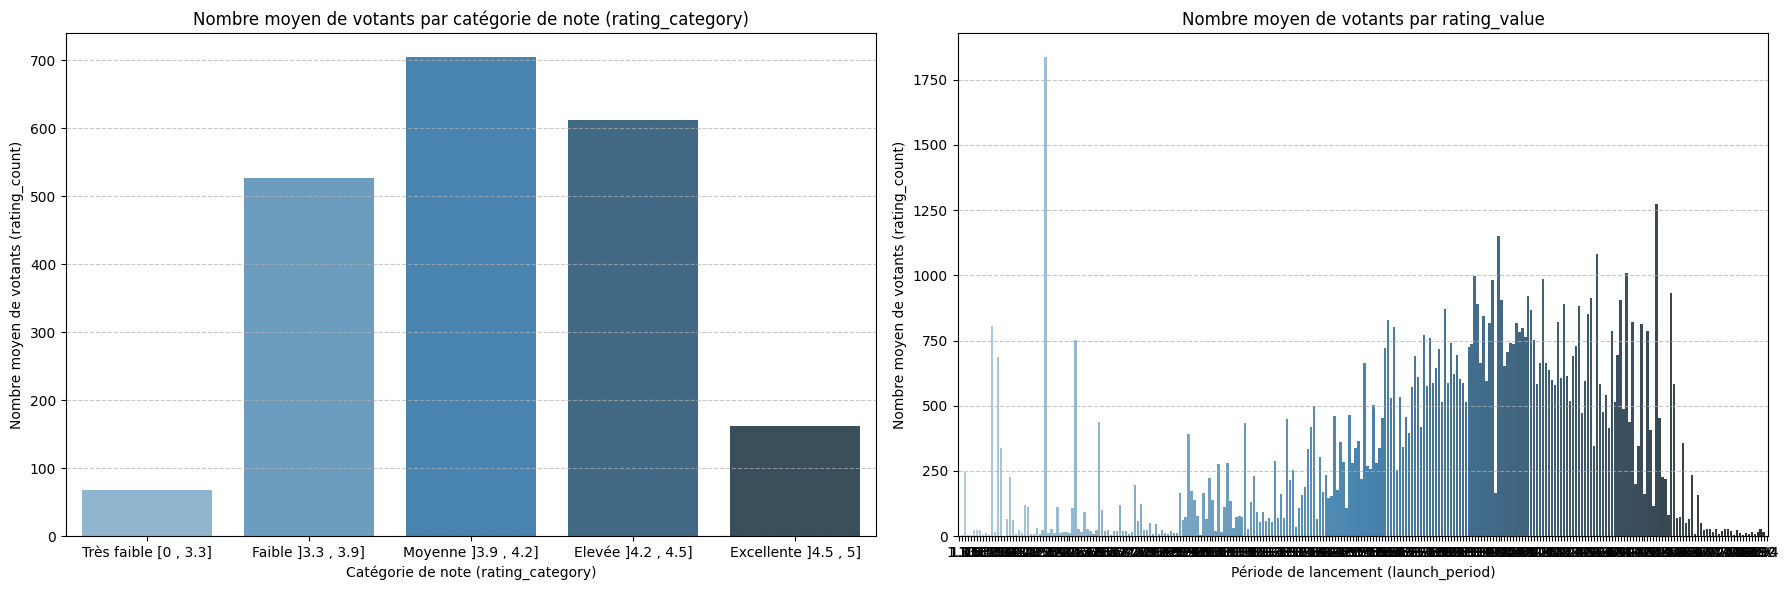

In [27]:
FDS_rating = FDS.dropna(subset=['rating_count', 'rating_value'])


# Calculer la moyenne de rating_count par rating_category
mean_voters_by_category = FDS_rating.groupby('rating_category')['rating_count'].mean().reset_index()

# Calculer la moyenne de rating_count par launch_period
mean_voters_by_rating_value = FDS_rating.groupby('rating_value')['rating_count'].mean().reset_index()

# Créer une figure avec deux sous-graphiques (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot pour rating_category
sns.barplot(data=mean_voters_by_category, x='rating_category', y='rating_count', palette='Blues_d', ax=axes[0])
axes[0].set_title("Nombre moyen de votants par catégorie de note (rating_category)")
axes[0].set_xlabel("Catégorie de note (rating_category)")
axes[0].set_ylabel("Nombre moyen de votants (rating_count)")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar plot pour launch_period
sns.barplot(data=mean_voters_by_rating_value, x='rating_value', y='rating_count', palette='Blues_d', ax=axes[1])
axes[1].set_title("Nombre moyen de votants par rating_value")
axes[1].set_xlabel("Période de lancement (launch_period)")
axes[1].set_ylabel("Nombre moyen de votants (rating_count)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

**La meme chose mais en enlevant les parfums à moins de N votes**

C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\3431218896.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_voters_by_category = FDS_rating_uper_N_votes.groupby('rating_category')['rating_count'].mean().reset_index()
C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\3431218896.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_voters_by_category, x='rating_category', y='rating_count', palette='Blues_d', ax=axes[0])
C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\3431218896.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

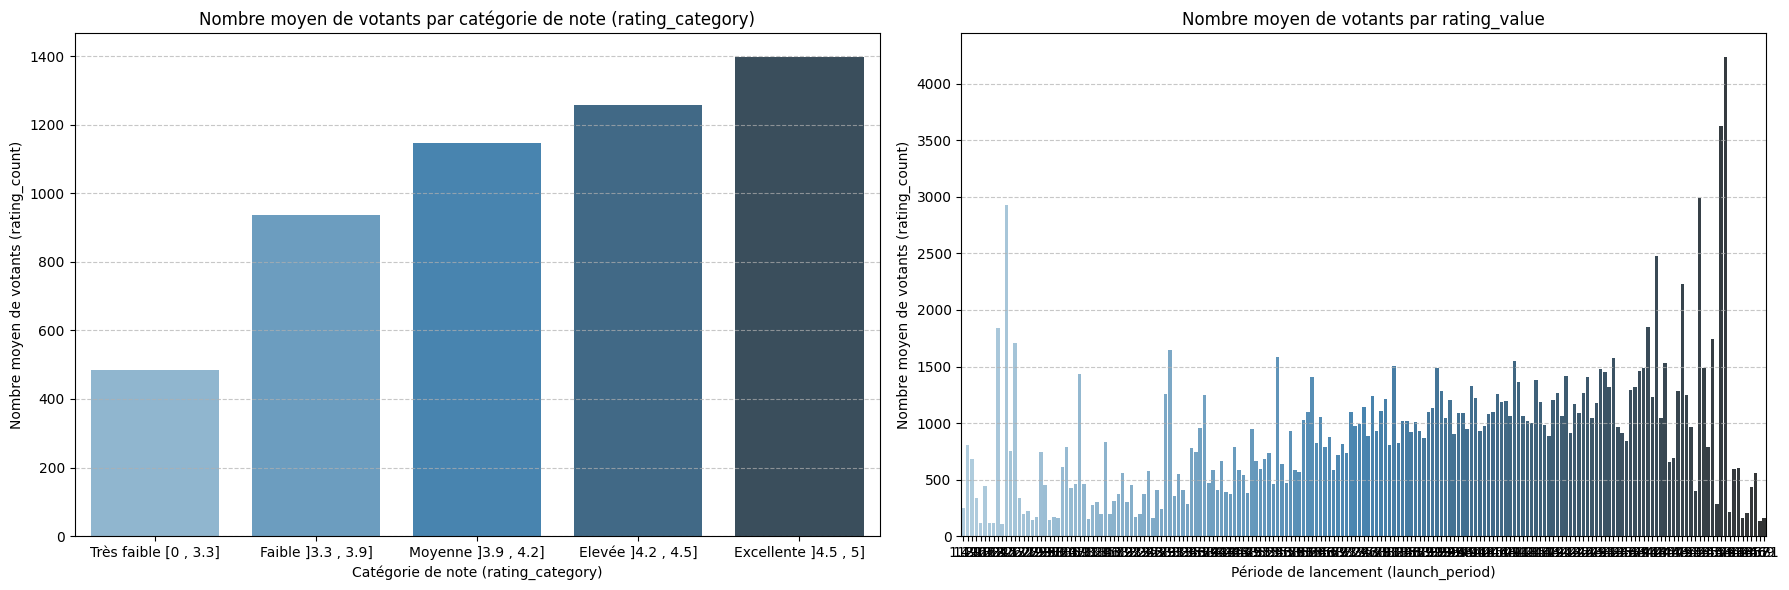

In [28]:
N = 100 # nombre minimal de votants

FDS_rating_uper_N_votes = FDS.dropna(subset=['rating_count', 'rating_value'])
FDS_rating_uper_N_votes = FDS_rating_uper_N_votes[FDS_rating_uper_N_votes['rating_count'] > N]

# Calculer la moyenne de rating_count par rating_category
mean_voters_by_category = FDS_rating_uper_N_votes.groupby('rating_category')['rating_count'].mean().reset_index()

# Calculer la moyenne de rating_count par launch_period
mean_voters_by_rating_value = FDS_rating_uper_N_votes.groupby('rating_value')['rating_count'].mean().reset_index()

# Créer une figure avec deux sous-graphiques (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot pour rating_category
sns.barplot(data=mean_voters_by_category, x='rating_category', y='rating_count', palette='Blues_d', ax=axes[0])
axes[0].set_title("Nombre moyen de votants par catégorie de note (rating_category)")
axes[0].set_xlabel("Catégorie de note (rating_category)")
axes[0].set_ylabel("Nombre moyen de votants (rating_count)")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar plot pour launch_period
sns.barplot(data=mean_voters_by_rating_value, x='rating_value', y='rating_count', palette='Blues_d', ax=axes[1])
axes[1].set_title("Nombre moyen de votants par rating_value")
axes[1].set_xlabel("Période de lancement (launch_period)")
axes[1].set_ylabel("Nombre moyen de votants (rating_count)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

**Selon le N choisi il y a de grosse disparité dans les résultats, à creuser !**

##### Rating_value moyenne par nombre de votant et 'popularity'

C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\4138253515.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating_by_popularity = FDS.groupby('popularity')['rating_value'].mean().reset_index()
C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\4138253515.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating_by_popularity_uper_N_votes = FDS_rating_uper_N_votes.groupby('popularity')['rating_value'].mean().reset_index()
C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\4138253515.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

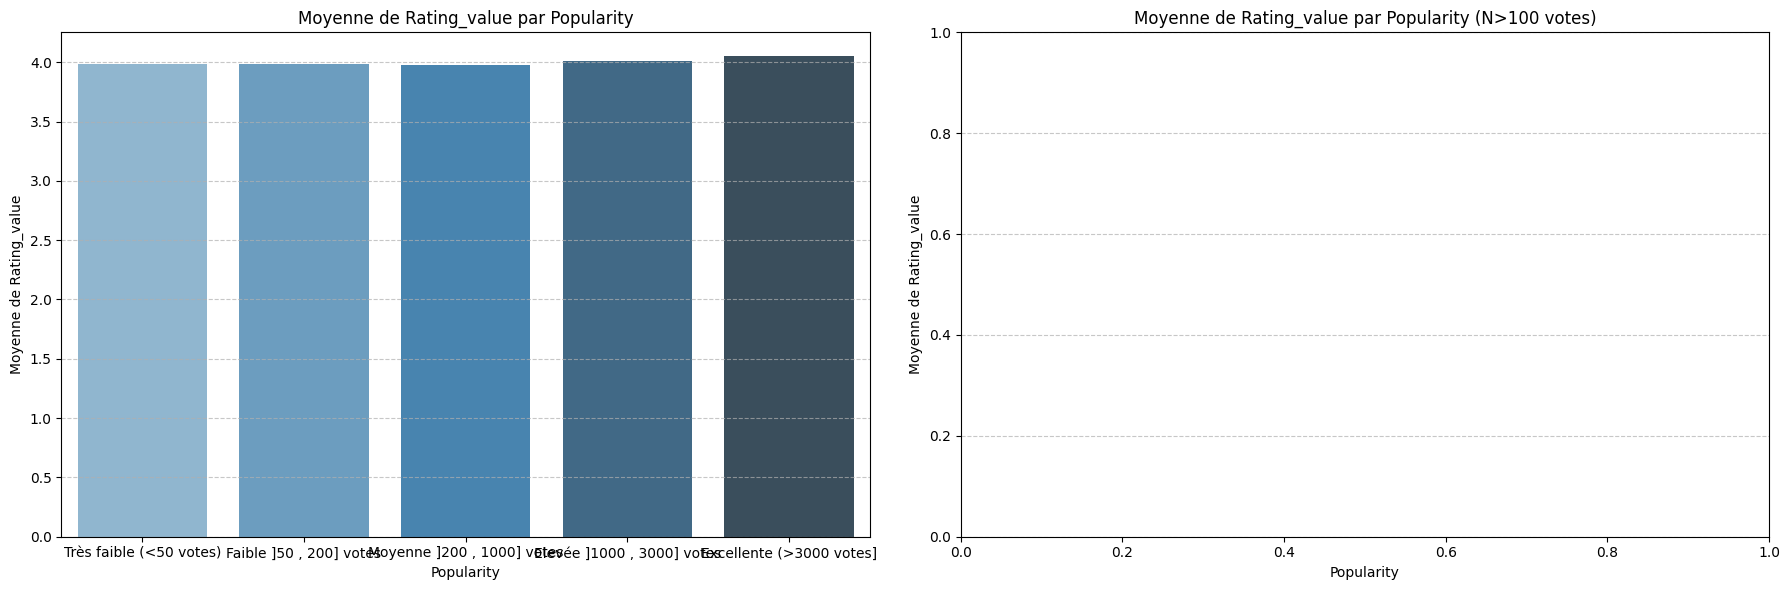

In [29]:
FDS_rating = FDS.dropna(subset=['rating_count', 'rating_value'])

N= 100 # nombre minimal de votants
FDS_rating_uper_N_votes = FDS.dropna(subset=['rating_count', 'rating_value'])
FDS_rating_uper_N_votes = FDS_rating_uper_N_votes[FDS_rating_uper_N_votes['rating_count'] > N]

# Calculer la moyenne de rating_value par popularity
mean_rating_by_popularity = FDS.groupby('popularity')['rating_value'].mean().reset_index()
mean_rating_by_popularity_uper_N_votes = FDS_rating_uper_N_votes.groupby('popularity')['rating_value'].mean().reset_index()

# Créer une figure avec deux sous-graphiques (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot pour popularity
sns.barplot(data=mean_rating_by_popularity, x='popularity', y='rating_value', palette='Blues_d', ax=axes[0])
axes[0].set_title("Moyenne de Rating_value par Popularity")
axes[0].set_xlabel("Popularity")
axes[0].set_ylabel("Moyenne de Rating_value")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
# Bar plot pour popularity
sns.barplot(data=mean_rating_by_popularity_uper_N_votes, x='popularity', y='rating_value', palette='Blues_d', ax=axes[0])
axes[1].set_title("Moyenne de Rating_value par Popularity (N>100 votes)")
axes[1].set_xlabel("Popularity")
axes[1].set_ylabel("Moyenne de Rating_value")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

#### B) launch_year VS rating_value

In [30]:
# Garder les valeurs non nulles pour les calculs
FDS_launchVSrating = FDS.dropna(subset=['launch_year', 'rating_value'])

**Corrélation**



Coefficient de corrélation entre launch_year et rating_value :
Coefficient de corrélation de Pearson : -0.08
Coefficient de corrélation de Spearman : -0.03


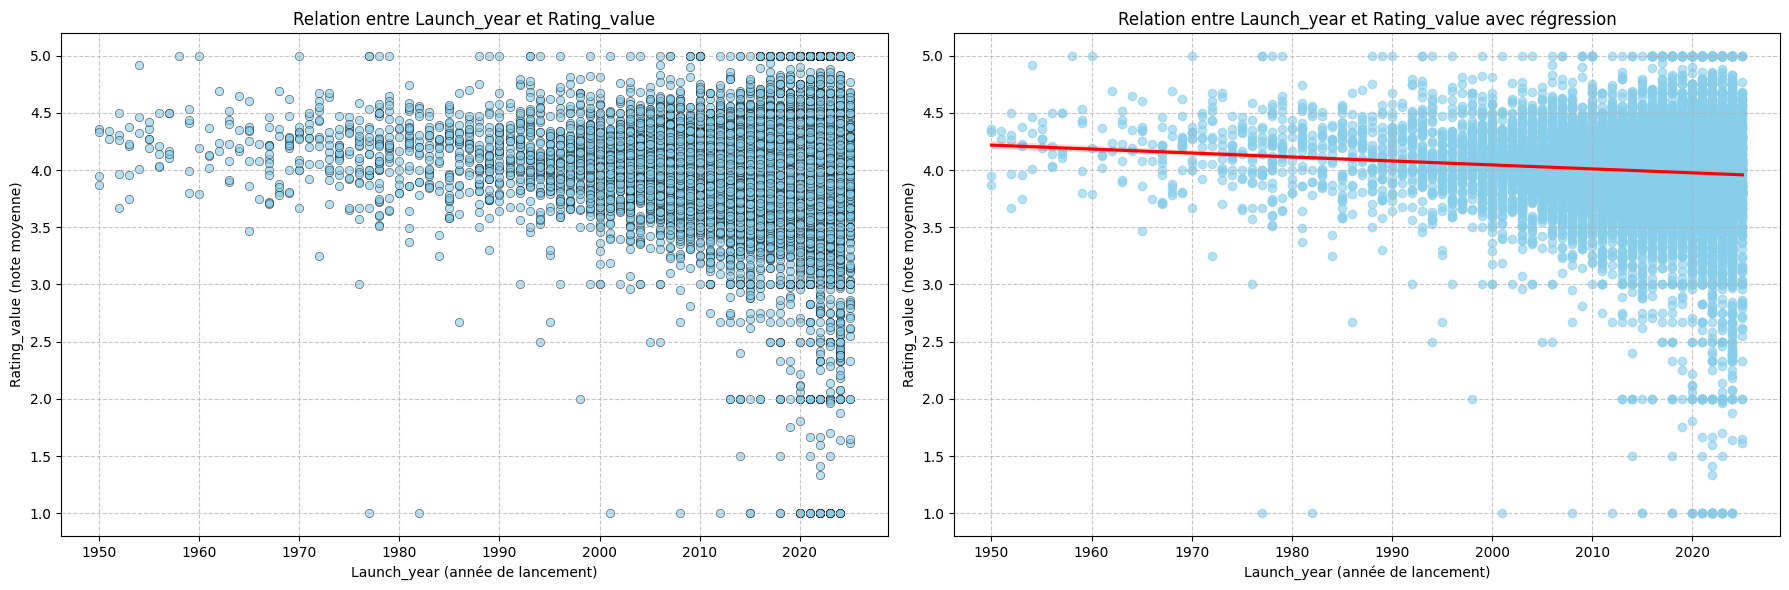

In [31]:
from scipy.stats import spearmanr, pearsonr

# Calcul du coefficient de corrélation
pearson_corr, _ = pearsonr(FDS_rating['rating_count'], FDS_rating['rating_value'])
spearman_corr, _ = spearmanr(FDS_rating['rating_count'], FDS_rating['rating_value'])

# Calcul du coefficient de corrélation
pearson_corr, _ = pearsonr(FDS_launchVSrating['launch_year'], FDS_launchVSrating['rating_value'])
spearman_corr, _ = spearmanr(FDS_launchVSrating['launch_year'], FDS_launchVSrating['rating_value'])

# Affichage des résultats
print(f"\n\nCoefficient de corrélation entre launch_year et rating_value :")
print(f"Coefficient de corrélation de Pearson : {pearson_corr:.2f}")
print(f"Coefficient de corrélation de Spearman : {spearman_corr:.2f}")

# Créer une figure avec deux sous-graphiques (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot (nuage de points)
sns.scatterplot(data=FDS_launchVSrating, x='launch_year', y='rating_value', alpha=0.6, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title("Relation entre Launch_year et Rating_value")
axes[0].set_xlabel("Launch_year (année de lancement)")
axes[0].set_ylabel("Rating_value (note moyenne)")
axes[0].grid(axis='both', linestyle='--', alpha=0.7)

# Scatter plot avec régression
sns.regplot(data=FDS_launchVSrating, x='launch_year', y='rating_value', scatter_kws={'alpha':0.6, 'color':'skyblue'}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title("Relation entre Launch_year et Rating_value avec régression")
axes[1].set_xlabel("Launch_year (année de lancement)")
axes[1].set_ylabel("Rating_value (note moyenne)")
axes[1].grid(axis='both', linestyle='--', alpha=0.7)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

**Interprétation :**

Ces résultats suggèrent que l'a,née de lancement (rating_count) n'a pas d'impact significatif sur la note moyenne (rating_value).

Cela semble indiquer que les parfums anciens ont des notes à peine plus élevées que les parfums plus récents.


C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\766059159.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ratings_by_period = FDS_launchVSrating.groupby('launch_period')['rating_value'].mean().reset_index()
C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\766059159.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_ratings_by_period, x='launch_period', y='rating_value', palette='Blues_d', ax=axes[0])
C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\766059159.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

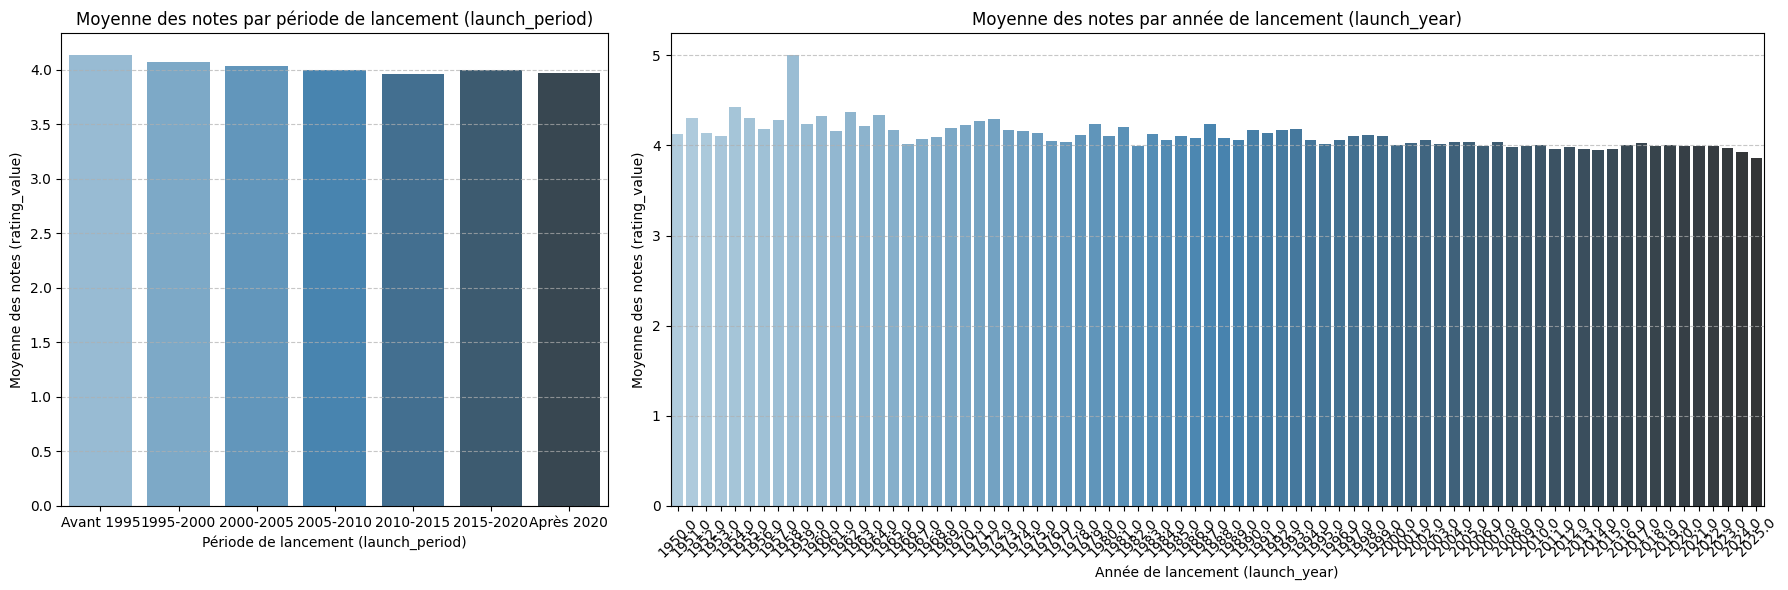

In [32]:
# Calculer la moyenne de rating_value par launch_period
mean_ratings_by_period = FDS_launchVSrating.groupby('launch_period')['rating_value'].mean().reset_index()
mean_ratings_by_launch_year = FDS_launchVSrating.groupby('launch_year')['rating_value'].mean().reset_index()


# Créer une figure avec deux sous-graphiques (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2]})

# Bar plot pour launch_period
sns.barplot(data=mean_ratings_by_period, x='launch_period', y='rating_value', palette='Blues_d', ax=axes[0])
axes[0].set_title("Moyenne des notes par période de lancement (launch_period)")
axes[0].set_xlabel("Période de lancement (launch_period)")
axes[0].set_ylabel("Moyenne des notes (rating_value)")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar plot pour launch_year
sns.barplot(data=mean_ratings_by_launch_year, x='launch_year', y='rating_value', palette='Blues_d', ax=axes[1])
axes[1].set_title("Moyenne des notes par année de lancement (launch_year)")
axes[1].set_xlabel("Année de lancement (launch_year)")
axes[1].set_ylabel("Moyenne des notes (rating_value)")
axes[1].tick_params(axis='x', rotation=45)  # Rotation des labels pour une meilleure lisibilité
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

**INTERPRETATION :** 

Une moyenne de note stable, la légère décroissance peut aussi etre du au peu de data sur les anciennes périodes

#### C) launch_year VS rating_count


In [33]:
FDS_launchVSrating_count = FDS.dropna(subset=['launch_year', 'rating_count'])
# Calcul du coefficient de corrélation
pearson_corr, _ = pearsonr(FDS_launchVSrating_count['launch_year'], FDS_launchVSrating_count['rating_count'])
spearman_corr, _ = spearmanr(FDS_launchVSrating_count['launch_year'], FDS_launchVSrating_count['rating_count'])

# Affichage des résultats
print(f"\n\nCoefficient de corrélation entre launch_year et rating_count :")
print(f"Coefficient de corrélation de Pearson : {pearson_corr:.2f}")
print(f"Coefficient de corrélation de Spearman : {spearman_corr:.2f}")




Coefficient de corrélation entre launch_year et rating_count :
Coefficient de corrélation de Pearson : -0.15
Coefficient de corrélation de Spearman : -0.30


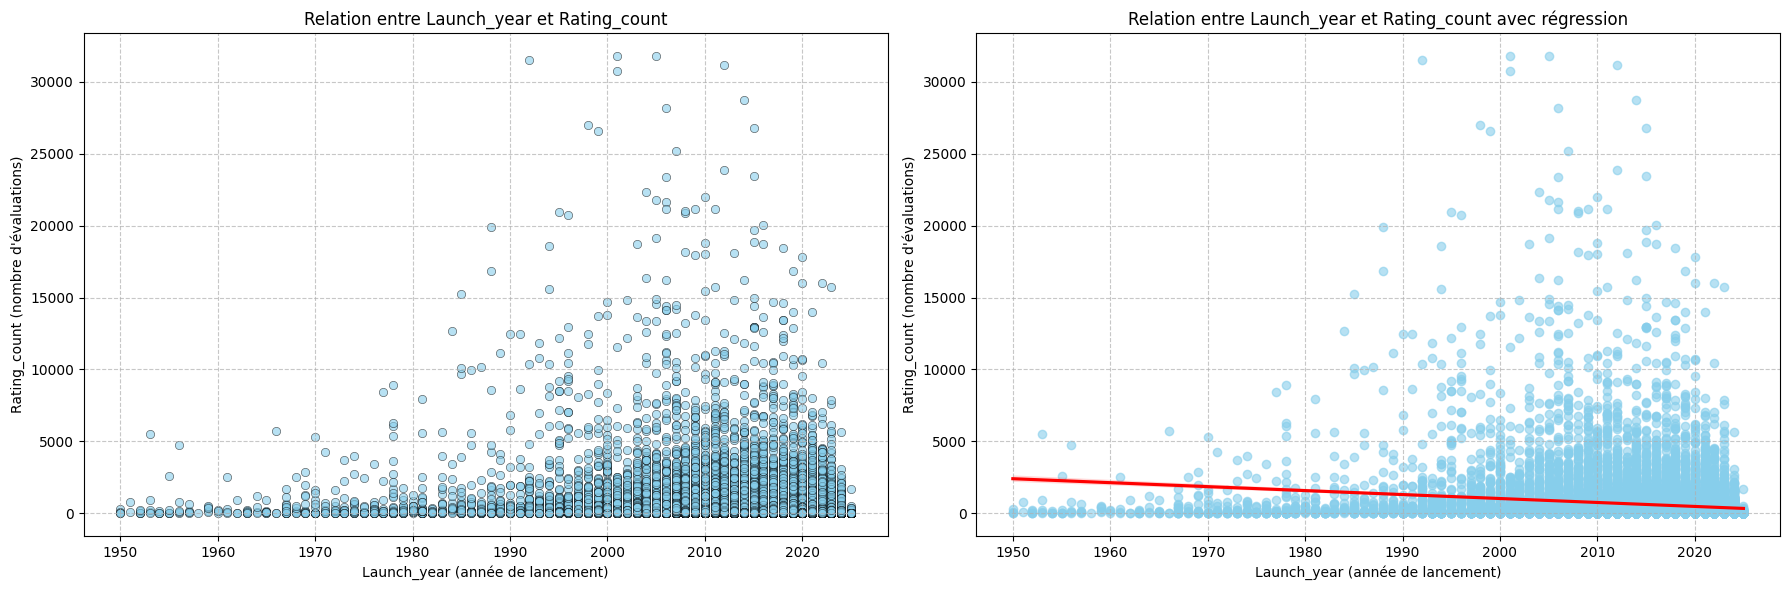

In [34]:
# Créer une figure avec deux sous-graphiques (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot (nuage de points)
sns.scatterplot(data=FDS_launchVSrating, x='launch_year', y='rating_count', alpha=0.6, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title("Relation entre Launch_year et Rating_count")
axes[0].set_xlabel("Launch_year (année de lancement)")
axes[0].set_ylabel("Rating_count (nombre d'évaluations)")
axes[0].grid(axis='both', linestyle='--', alpha=0.7)

# Scatter plot avec régression
sns.regplot(data=FDS_launchVSrating, x='launch_year', y='rating_count', scatter_kws={'alpha':0.6, 'color':'skyblue'}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title("Relation entre Launch_year et Rating_count avec régression")
axes[1].set_xlabel("Launch_year (année de lancement)")
axes[1].set_ylabel("Rating_count (nombre d'évaluations)")
axes[1].grid(axis='both', linestyle='--', alpha=0.7)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### 3.1.3 Croisements avec quelques variables qualitatives

#### A) Rating_value vs gender

C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\1379996123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=FDS, x='gender', y='rating_value', palette='Set2')


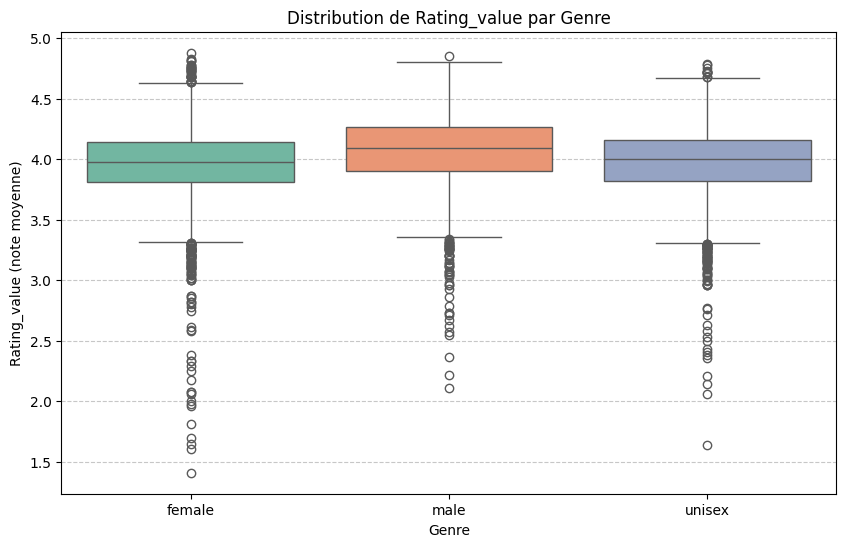

In [35]:
# Boxplot pour visualiser Rating_value par genre
plt.figure(figsize=(10, 6))
sns.boxplot(data=FDS, x='gender', y='rating_value', palette='Set2')
plt.title("Distribution de Rating_value par Genre")
plt.xlabel("Genre")
plt.ylabel("Rating_value (note moyenne)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### B) brand vs rating_value

C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\1948432045.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rating_by_brand, x='rating_value', y='brand', palette='Blues_d')


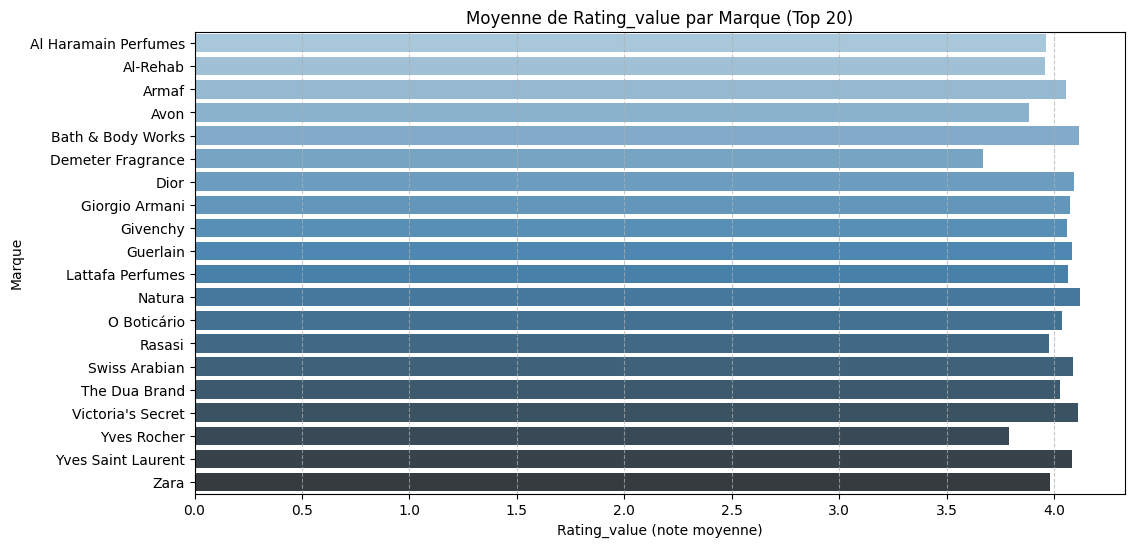

In [36]:
# Limiter aux 20 marques les plus fréquentes
top_20_brands = FDS['brand'].value_counts().head(20).index
FDS_top_brands = FDS[FDS['brand'].isin(top_20_brands)]

# Calculer la moyenne de Rating_value par marque
mean_rating_by_brand = FDS_top_brands.groupby('brand')['rating_value'].mean().reset_index()

# Bar plot pour visualiser les notes moyennes par marque
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_rating_by_brand, x='rating_value', y='brand', palette='Blues_d')
plt.title("Moyenne de Rating_value par Marque (Top 20)")
plt.xlabel("Rating_value (note moyenne)")
plt.ylabel("Marque")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Détection de parfums 'stars' ou mal aimés

In [37]:
N = 2000
FDS_rating_uper_N_votes = FDS.dropna(subset=['rating_count', 'rating_value'])
FDS_rating_uper_N_votes = FDS_rating_uper_N_votes[FDS_rating_uper_N_votes['rating_count'] > N]

# Les parfums avec la pire rating_value
worst_rated = FDS_rating_uper_N_votes.nsmallest(10, 'rating_value')
print("Les 10 parfums les moins bien notés :")
print(worst_rated[['name', 'brand', 'rating_value', 'rating_count']])
# Les parfums avec la meilleure rating_value
best_rated = FDS_rating_uper_N_votes.nlargest(10, 'rating_value')
print("\n\nLes 10 parfums les mieux notés :")
print(best_rated[['name', 'brand', 'rating_value', 'rating_count']])

Les 10 parfums les moins bien notés :
                         name                brand  rating_value  rating_count
13140  Secretions Magnifiques  Etat Libre d'Orange          2.50          2930
4780              Vanilla Sex             Tom Ford          3.10          2649
12820                Red Door      Elizabeth Arden          3.30          4116
10315             Kenzo World                Kenzo          3.31          3149
17514                Perceive                 Avon          3.36          3421
4508                    Kirke      Tiziana Terenzi          3.38          7673
17511           Passion Dance                 Avon          3.39          2059
18116             Joy by Dior                 Dior          3.39          4517
7534               Egeo Dolce          O Boticário          3.41          2173
1399              FlowerParty          Yves Rocher          3.42          2261


Les 10 parfums les mieux notés :
                                              name        

**Le cas PRIDE**

In [38]:
#Identifier les parfums contenant le mot Pride dans leur nom
pride_parfums = FDS[FDS['name'].str.contains('Pride', case=False, na=False)]
print("Parfums contenant le mot 'Pride' :")
print(pride_parfums[['name', 'brand', 'rating_value', 'rating_count']])


Parfums contenant le mot 'Pride' :
                                     name               brand  rating_value  \
1202       Accento Overdose Pride Edition             Xerjoff          1.41   
4055                      Pride of Kuwait       The Dua Brand          5.00   
5588               Polo Red Pride Edition        Ralph Lauren          2.06   
5602                  Ralph Pride Edition        Ralph Lauren          2.11   
5865                        Intense Pride       Swiss Arabian          4.38   
6210                                Pride              Rasasi          2.50   
13543                Classique Pride 2023  Jean Paul Gaultier          1.98   
13544                Classique Pride 2024  Jean Paul Gaultier          2.18   
13545             Classique Pride Edition  Jean Paul Gaultier          2.77   
13624                  Le Male Pride 2023  Jean Paul Gaultier          1.96   
13625                  Le Male Pride 2024  Jean Paul Gaultier          2.08   
13626            

## 3.2 *Analyses variables catégorielles :*
   - brandreprésentées.
   - Parfumeurs (nose) les plus prolifiques.
   - Accords dominants (ex. “floral”, “woody”, “citrus”…) dans `main_accords`.
   - Répartition de `gender` (H/F/Unisex).
   - Longevity, Sillage (faible, modéré, fort, énorme, etc.).

### Marques

C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\3404310260.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='Blues_d')


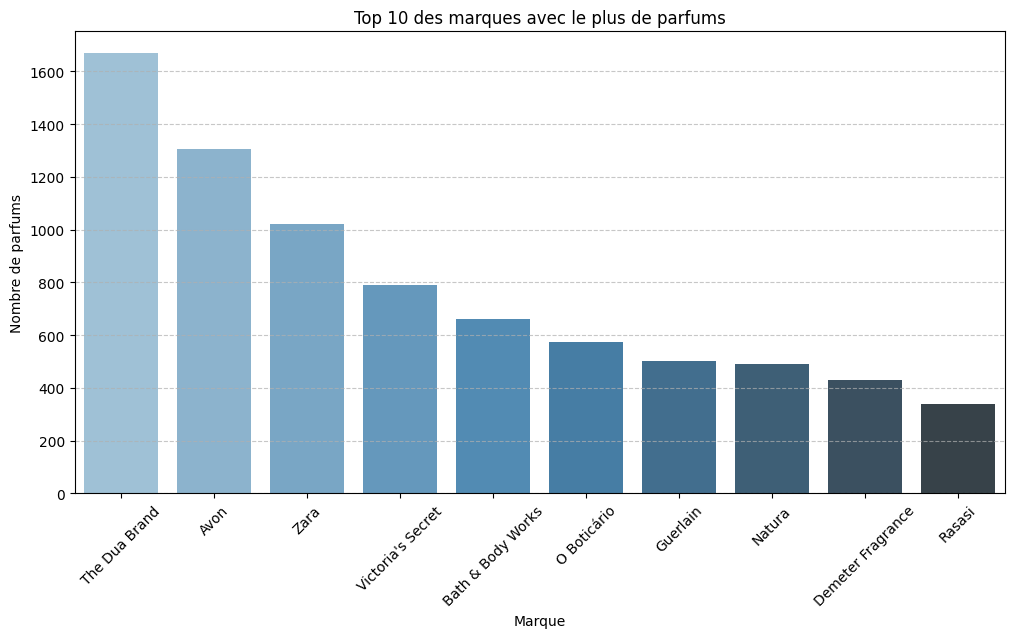

C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\3404310260.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands_uper_N_votes.index, y=top_brands_uper_N_votes.values, palette='Blues_d')


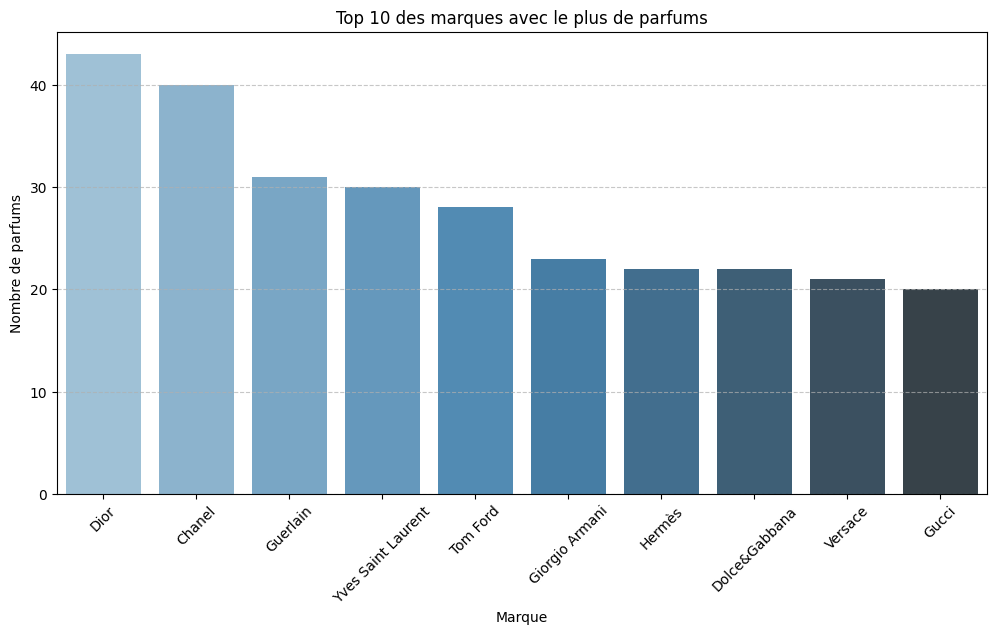

In [39]:
N = 3000 # nombre minimal de votants
FDS_rating_uper_N_votes = FDS.dropna(subset=['rating_count', 'rating_value'])
FDS_rating_uper_N_votes = FDS_rating_uper_N_votes[FDS_rating_uper_N_votes['rating_count'] > N]

# Les marques avec le plus de parfums
top_brands = FDS['brand'].value_counts().head(10)
top_brands_uper_N_votes = FDS_rating_uper_N_votes['brand'].value_counts().head(10)

# Graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='Blues_d')
plt.title("Top 10 des marques avec le plus de parfums")
plt.xlabel("Marque")
plt.ylabel("Nombre de parfums")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Les marques avec le plus de parfums valides
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands_uper_N_votes.index, y=top_brands_uper_N_votes.values, palette='Blues_d')
plt.title("Top 10 des marques avec le plus de parfums")
plt.xlabel("Marque")
plt.ylabel("Nombre de parfums")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Top 10 des marques avec les meilleures notes moyennes :
                 brand      mean  median       std  count
57   Ermenegildo Zegna  4.293333   4.305  0.245072     54
143         Perfumer H  4.273810   4.290  0.376051     42
38              Chanel  4.176288   4.175  0.189485    132
157          Roja Dove  4.166098   4.205  0.373076    164
17          Balenciaga  4.144286   4.180  0.243636     28
105    Maison Alhambra  4.141635   4.195  0.320750    208
148              Prada  4.138776   4.160  0.258785     98
7              Amouage  4.132319   4.140  0.275176    138
128             Natura  4.122121   4.120  0.301138    481
176        Viktor&Rolf  4.117879   4.190  0.373271     99


Top 10 des marques avec les meilleures notes moyennes (N > 100 votes) :
                 brand      mean  median       std  count
57   Ermenegildo Zegna  4.325185   4.340  0.200602     27
179      Welton London  4.320000   4.320       NaN      1
105    Maison Alhambra  4.241333   4.255  0.195435     60


C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\1516390.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands_by_mean, x='mean', y='brand', palette='Blues_d', ax=axes[0])
C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\1516390.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands_by_mean_uper_N_votes, x='mean', y='brand', palette='Greens_d', ax=axes[1])


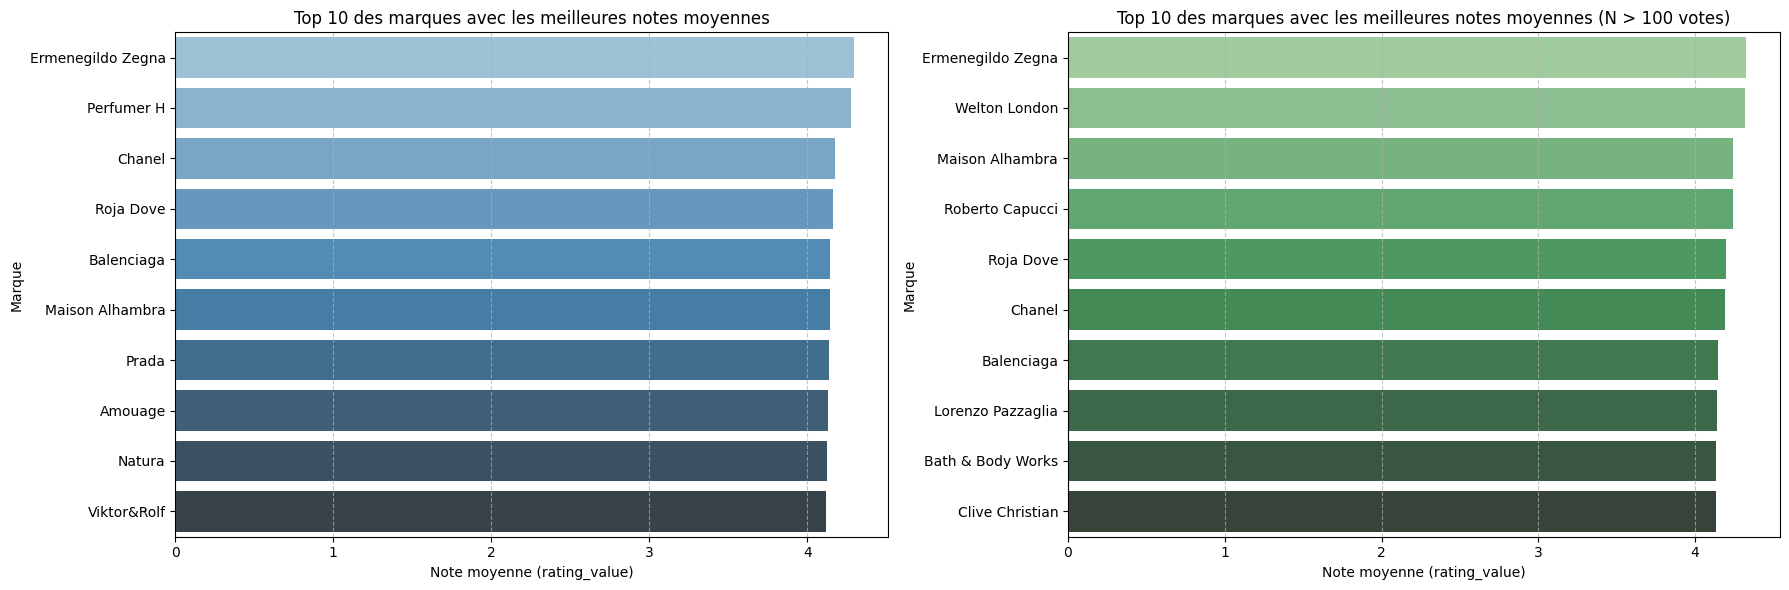

In [40]:
# Calculer les statistiques descriptives pour chaque marque
brand_stats = FDS.groupby('brand')['rating_value'].agg(['mean', 'median', 'std', 'count']).reset_index()
N = 100 # nombre minimal de votants
brand_stats_uper_N_votes = FDS.dropna(subset=['rating_count', 'rating_value'])
brand_stats_uper_N_votes = brand_stats_uper_N_votes[brand_stats_uper_N_votes['rating_count'] > N]
brand_stats_uper_N_votes = brand_stats_uper_N_votes.groupby('brand')['rating_value'].agg(['mean', 'median', 'std', 'count']).reset_index()

# Trier les marques par note moyenne décroissante
top_brands_by_mean = brand_stats.sort_values(by='mean', ascending=False).head(10)
top_brands_by_mean_uper_N_votes = brand_stats_uper_N_votes.sort_values(by='mean', ascending=False).head(10)

# Afficher les résultats
print("Top 10 des marques avec les meilleures notes moyennes :")
print(top_brands_by_mean)
print(f"\n\nTop 10 des marques avec les meilleures notes moyennes (N > {N} votes) :")
print(top_brands_by_mean_uper_N_votes)

# Créer une figure avec deux sous-graphiques (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot pour les meilleures marques par note moyenne
sns.barplot(data=top_brands_by_mean, x='mean', y='brand', palette='Blues_d', ax=axes[0])
axes[0].set_title("Top 10 des marques avec les meilleures notes moyennes")
axes[0].set_xlabel("Note moyenne (rating_value)")
axes[0].set_ylabel("Marque")
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Bar plot pour les meilleures marques par note moyenne (N > 1000 votes)
sns.barplot(data=top_brands_by_mean_uper_N_votes, x='mean', y='brand', palette='Greens_d', ax=axes[1])
axes[1].set_title(f"Top 10 des marques avec les meilleures notes moyennes (N > {N} votes)")
axes[1].set_xlabel("Note moyenne (rating_value)")
axes[1].set_ylabel("Marque")
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


### Parfumeur

Top 10 des parfumeurs les plus prolifiques :
nose
Alberto Morillas               322
Verônica Kato                  267
Pierre Montale                 209
Francis Kurkdjian              193
Olivier Cresp                  187
François Demachy               183
Thierry Wasser                 183
Anne Flipo                     171
Jacques Cavallier Belletrud    160
Pierre Guillaume               151
Roja Dove                      140
Dominique Ropion               139
Carlos Benaïm                  122
Daniela Andrier                111
Paolo Terenzi                  111
Name: count, dtype: int64


C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\2808060008.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_noses.values, y=top_noses.index, palette='Blues_d', ax=axes[0])


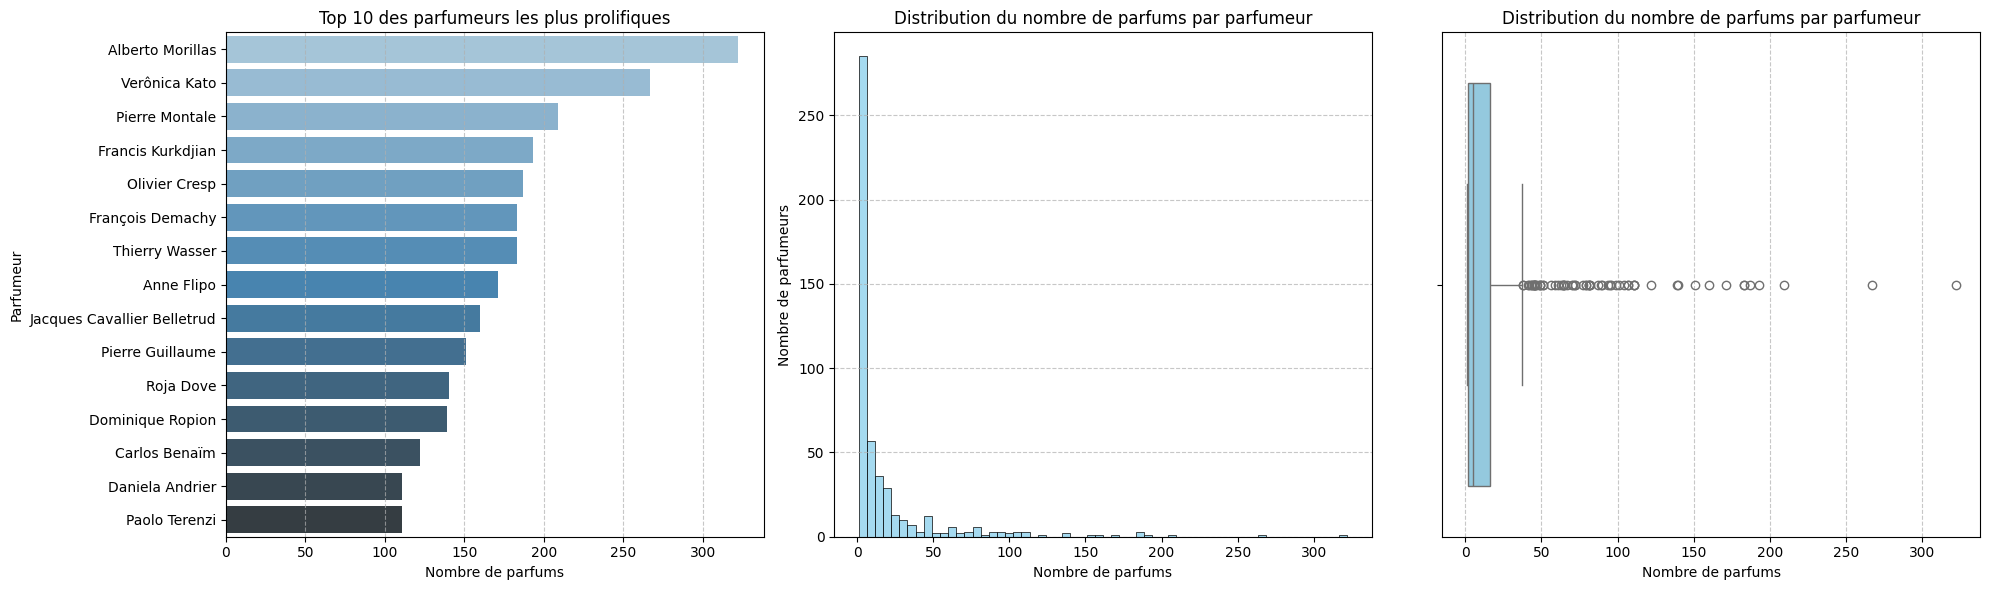

In [41]:
# Table de fréquences : Parfumeurs les plus prolifiques
top_noses = FDS['nose'].value_counts().head(15)

# Afficher la table de fréquences
print("Top 10 des parfumeurs les plus prolifiques :")
print(top_noses)


# Créer une figure avec trois sous-graphiques (1 ligne, 3 colonnes)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Bar plot des parfumeurs les plus prolifiques
sns.barplot(x=top_noses.values, y=top_noses.index, palette='Blues_d', ax=axes[0])
axes[0].set_title("Top 10 des parfumeurs les plus prolifiques")
axes[0].set_xlabel("Nombre de parfums")
axes[0].set_ylabel("Parfumeur")
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Histogramme de la distribution du nombre de parfums par parfumeur
sns.histplot(FDS['nose'].value_counts(), bins=60, kde=False, color='skyblue', ax=axes[1])
axes[1].set_title("Distribution du nombre de parfums par parfumeur")
axes[1].set_xlabel("Nombre de parfums")
axes[1].set_ylabel("Nombre de parfumeurs")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot de la distribution du nombre de parfums par parfumeur
sns.boxplot(x=FDS['nose'].value_counts(), color='skyblue', ax=axes[2])
axes[2].set_title("Distribution du nombre de parfums par parfumeur")
axes[2].set_xlabel("Nombre de parfums")
axes[2].grid(axis='x', linestyle='--', alpha=0.7)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

**Avec VS sans parfumeur**

Note moyenne des parfums avec parfumeur : 3.98
Note moyenne des parfums sans parfumeur : 4.00
Nombre moyen de votants pour les parfums avec parfumeur : 1018.02
Nombre moyen de votants pour les parfums sans parfumeur : 220.14


C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\121385496.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Parfumeur identifié', y='Nombre moyen de votants', palette='Set2', ax=axes[0])
C:\Users\tapri\AppData\Local\Temp\ipykernel_18352\121385496.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=FDS, x=FDS['nose'].notna(), y='rating_value', palette='Set2', ax=axes[1])


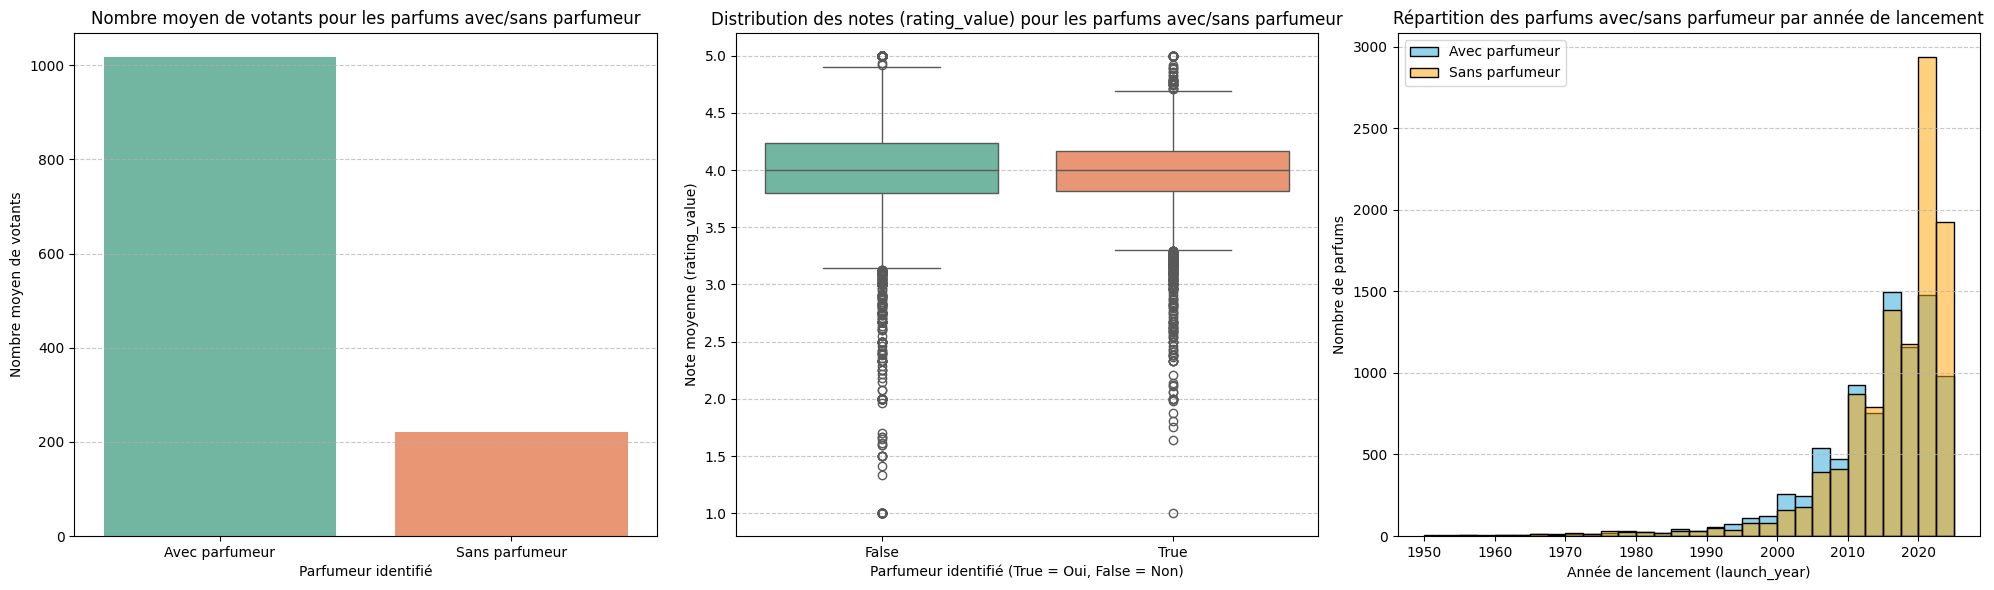

In [42]:
#Parfum sAvec / ans parfumeur
parfum_with_nose = FDS[FDS['nose'].notna()]
parfum_without_nose = FDS[FDS['nose'].isna()]

# Calcul des moyennes de rating_value
mean_with_nose = parfum_with_nose['rating_value'].mean()
mean_without_nose = parfum_without_nose['rating_value'].mean()

print(f"Note moyenne des parfums avec parfumeur : {mean_with_nose:.2f}")
print(f"Note moyenne des parfums sans parfumeur : {mean_without_nose:.2f}")

# Calcul des moyennes de rating_count
mean_voters_with_nose = parfum_with_nose['rating_count'].mean()
mean_voters_without_nose = parfum_without_nose['rating_count'].mean()

print(f"Nombre moyen de votants pour les parfums avec parfumeur : {mean_voters_with_nose:.2f}")
print(f"Nombre moyen de votants pour les parfums sans parfumeur : {mean_voters_without_nose:.2f}")

# Bar plot pour visualiser les moyennes
data = pd.DataFrame({
    'Parfumeur identifié': ['Avec parfumeur', 'Sans parfumeur'],
    'Nombre moyen de votants': [mean_voters_with_nose, mean_voters_without_nose]
})


# Créer une figure avec trois sous-graphiques (1 ligne, 3 colonnes)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Bar plot pour visualiser les moyennes de votants
sns.barplot(data=data, x='Parfumeur identifié', y='Nombre moyen de votants', palette='Set2', ax=axes[0])
axes[0].set_title("Nombre moyen de votants pour les parfums avec/sans parfumeur")
axes[0].set_xlabel("Parfumeur identifié")
axes[0].set_ylabel("Nombre moyen de votants")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot pour visualiser la distribution des notes
sns.boxplot(data=FDS, x=FDS['nose'].notna(), y='rating_value', palette='Set2', ax=axes[1])
axes[1].set_title("Distribution des notes (rating_value) pour les parfums avec/sans parfumeur")
axes[1].set_xlabel("Parfumeur identifié (True = Oui, False = Non)")
axes[1].set_ylabel("Note moyenne (rating_value)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Histogramme pour launch_year
sns.histplot(parfum_with_nose['launch_year'], bins=30, color='skyblue', label='Avec parfumeur',alpha= 0.9, kde=False, ax=axes[2])
sns.histplot(parfum_without_nose['launch_year'], bins=30, color='orange', label='Sans parfumeur',alpha= 0.5, kde=False, ax=axes[2])
axes[2].set_title("Répartition des parfums avec/sans parfumeur par année de lancement")
axes[2].set_xlabel("Année de lancement (launch_year)")
axes[2].set_ylabel("Nombre de parfums")
axes[2].legend()
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

## 4. Encodage et préparation des variables pour analyses avancées
---

4.1 Encodage des variables qualitatives
1. Choix entre One-Hot Encoding et Label Encoding
Label Encoding (codage ordinal ou numérique simple) :

Chaque modalité est transformée en un entier (0, 1, 2, …).

Avantages : rapide, ne produit qu’une seule colonne par variable.

Inconvénients : induit une relation d’ordre entre les modalités (0 < 1 < 2…) qui n’a pas forcément de sens pour des variables purement qualitatives (ex. marques, parfumeurs).

One-Hot Encoding (ou dummy variables) :

Chaque modalité devient une colonne binaire (0 ou 1).

Avantages : pas d’hypothèse d’ordre, meilleure séparation des catégories.

Inconvénients : peut faire exploser le nombre de colonnes si la variable contient beaucoup de modalités (marques, parfumeurs, etc.).

Recommandation générale :

Si la variable a peu de modalités (ex. gender : H, F, Unisex), un one-hot encoding est parfaitement adapté.

Si la variable a de nombreuses modalités (ex. des milliers de marques, de parfumeurs), vous pouvez :

Utiliser du label encoding si vous ne souhaitez pas imposer de dimension supplémentaire.

Faire un one-hot encoding partiel (conserver les top 10 ou 20 catégories, et regrouper le reste sous “Autres”) pour éviter la dimensionnalité excessive.

2. Gestion spécifique de main_accords (variable multi-label)
Plusieurs accords pour un même parfum :

Approche habituelle : générer autant de colonnes que d’accords potentiels (ex. floral, woody, citrus, fresh, sweet, etc.), avec 1 si l’accord est présent pour ce parfum, 0 sinon.

On parle alors de multi-hot encoding ou “multi-label binarisation”.

Nombre potentiel élevé d’accords :

S’il existe 30 ou 40 accords distincts, vous aurez 30 ou 40 colonnes après encodage.

Pas forcément un problème tant que vous gérez bien la suite (section 4.2).

Autres stratégies :

Sélectionner uniquement l’accord principal (le plus caractéristique) si vous voulez simplifier.

Faire un top X (ex. top 10 accords) et regrouper les moins fréquents en “Autres”.

3. Exemple de pipeline
brand :

One-hot encode uniquement les 20 marques les plus fréquentes, regroupe les autres en “Other_brands”.

nose (parfumeur) :

Même logique : label encoding ou “top 10 parfumeurs vs. autres” en one-hot.

gender :

3 colonnes (“masculin”, “féminin”, “unisex”) si on fait du one-hot, ou 1 colonne label encoding.

longevity, sillage :

Peu de modalités (faible, modéré, fort, énorme), parfait pour un one-hot ou un label encoding ordinal si la gradation de intensité a du sens.

main_accords :

Multi-hot encoding pour chaque accord détecté (floral, woody, musky, etc.).

4.2 Gestion du nombre de dimensions
1. Évaluation de la “dimensionnalité” après encodage
Après l’encodage one-hot / multi-hot, le nombre de colonnes peut passer de quelques dizaines à plusieurs centaines (surtout si vous avez beaucoup de marques, parfumeurs, accords).

Il convient donc de vérifier que vous n’avez pas trop de variables trop peu renseignées ou redondantes (risque d’overfitting pour la suite des analyses).

2. Stratégies pour limiter la dimension
Sélection de features (Feature Selection) :

Conserver uniquement les catégories (ou accords, marques, etc.) les plus fréquentes.

Éliminer les variables peu discriminantes ou rares.

Réduction de dimension (PCA) :

La PCA permet de projeter l’ensemble des variables dans un espace de dimension réduite (souvent 2 ou 3 axes pour la visualisation, ou plus si vous voulez alimenter un algorithme de clustering).

Utile pour éviter l’explosion combinatoire, surtout avec de nombreuses variables binaires issues de l’encodage.

Approches avancées :

Auto-encodeurs (réseaux de neurones) pour réduire la dimension.

Techniques de factorisation ou EMBEDDINGS (particulièrement pour des variables comme la marque ou le parfumeur, sur des très grands jeux de données).

3. Utilisation concrète
PCA sur données encodées :

Après avoir transformé toutes les variables qualitatives en variables numériques (et éventuellement normalisé ou standardisé vos variables), vous lancez la PCA.

Vous extrayez les composantes principales qui expliquent le plus de variance.

Ensuite, vous pouvez travailler sur ces composantes (par ex. 10 premières composantes) pour lancer un clustering ou une régression.

Interprétation :

En PCA, vous pourrez analyser les “loadings” (contributions des variables initiales sur chaque axe) pour voir, par exemple, si l’axe 1 sépare fortement floral vs. woody, ou niche vs. mainstream (si c’était encodé quelque part).

En résumé
Encodage : Choisir la méthode d’encodage (one-hot vs. label encoding) en fonction du nombre de modalités et de la nature des variables.

multi-label (main_accords) : Faire un multi-hot encoding pour chaque accord, ou se limiter à l’accord principal pour réduire la complexité.

Limitation de la dimension : Soit en restreignant le nombre de catégories encodées (top X), soit en utilisant la PCA (ou une autre méthode) pour faire de la réduction de dimension après encodage.

Objectif : Obtenir un jeu de données transformé qui soit prêt pour les analyses multivariées (analyse en composantes principales, clustering, etc.) sans se heurter à la “malédiction de la dimension” ou à un dataset trop volumineux.

En appliquant cette méthodologie, vous aurez une base structurée et plus “digeste” pour la suite (chapitres 5 et 6), tout en conservant l’essentiel de l’information issue de vos variables qualitatives.

### 4.1 *Encodage des variables qualitatives :*
   - One-hot encoding ou label encoding (selon la pertinence).
   - Attention à la variable `main_accords` (multi-label possible).

### 4.2 *Gestion du nombre de dimensions :*
   - Le multi-label peut générer beaucoup de variables.
   - Utiliser la PCA pour réduire la dimension.

